# Integration et transformation des données

Comme d'habitude, procédons à quelques imports qui pourraient être utiles... pandas, numpy, os, re, random(randint/seed), seaborn, matplotlib.

Attention, normalement, il serait d'usage de ne faire que les imports dont nous avons besoins, au fur et à mesure du déroulé du code, et de finalement les regrouper et les aggréger au début de notre fichier.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', False)
import numpy as np              
import os
import re
from random import randint, seed
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

#%whos # Permet d'afficher la liste des variables dans le notebook.

# Qu'avons nous à disposition ?

> Consigne :
> * A l'aide de la bibliothèque **```os```**, établir une liste de fichiers présents dans le dossier de travail.

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'insurance_features_CNAM.csv',
 'TP-TD_EDA_CNAM_vide_2022.ipynb',
 'TP-TD_integ_transfo_donnees_CNAM_vide_2022.ipynb',
 'TP-TD_visualisation_simples_CNAM_vide_2022.ipynb',
 'Transactions_EDA_CNAM.csv',
 'winequality_red2_EDA_CNAM.csv']

# Import du fichier : de travail

> Consignes : 
> * Nous conserverons le fichier 'Transactions_EDA_CNAM.csv'.
> * Importer le fichier en précisant que la colonne ```transaction_id``` est utilisé comme index.
> * Supprimer de la dataframe ```transactions``` toutes les lignes pour lesquelles la **somme totale** commandée est inférieure à 0.
> * La colonne ```tran-date```contient des dates sous format JJ-MM-AAAA et sous format JJ/MM/AAAA. Remplacer les ```/```par ```-```, afin d'uniformiser le contenu.
> * Convertir les colonnes ```prod_cat_code``` et ```prod_subcat_code``` en type 'int'.

In [3]:
transactions = pd.read_csv("Transactions_EDA_CNAM.csv", sep = ",", header = 0, index_col = 0)

transactions = transactions[transactions["total_amt"] > 0]

transactions["tran_date"] = transactions["tran_date"].replace(r"/","-",regex = True)

dictionnaire = {'prod_cat_code': 'int',
                'prod_subcat_code': 'int'}

transactions.astype(dictionnaire)



,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
transaction_id,,,,,,,,,
29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,e-Shop
25455265351,267750,20-02-2014,12,6,3,1360,428.400,4508.400,e-Shop
1571002198,275023,20-02-2014,6,5,4,587,246.540,2594.540,e-Shop
36554696014,269345,20-02-2014,3,5,3,1253,394.695,4153.695,e-Shop
56814940239,268799,20-02-2014,7,5,5,368,193.200,2033.200,e-Shop
...,...,...,...,...,...,...,...,...,...
94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR


# Travaillons avec les dates

Les données à disposition disposent souvent de variables temporelles. La donnée la plus souvent disponible est la date. Elle peut-être disponible sous de nombreuses formes. Nous aborderons ici un cas courrant et pas trop complexe, dans lequel la variable à disposition est la date de la transaction, dans un format "simple". Parfois, les dates sont bien plus complexes, indiquées en secondes, et avec des notions internationales (transactions réalisées dans plusieurs pays par exemple...).

Nous pouvons donc reprendre dans un premier ce que nous avons fait dans le premier notebook que nous avons travaillé, et y ajouter de nouvelles caractéristiques.

>Consigne:
>* Définir une fonction ```get_day``` prenant en argument une chaîne de caractères et qui renvoie le premier élément de son découpage par le caractère '-'.
>* Définir les fonctions ```get_month``` et ```get_year``` qui font de même avec le deuxième et troisième élément du découpage.
>* Dans 3 variables ```days```, ```months``` et ```years```, stocker le résultat de la méthode ```apply()``` sur la colonne ```tran_date``` appliquée avec les fonctions ```get_day```, ```get_month``` et ```get_year```. Comme ces fonctions s'appliquent élément par élément, il n'est pas nécessaire de spécifier l'argument axis dans la méthode apply.
>* Créer les colonnes 'day', 'month' et 'year' dans le DataFrame et y stocker les valeurs de days, months et years. La création d'une nouvelle colonne se fait simplement en la déclarant:
> * Convertir les colonnes ```day```, ```month``` et ```year``` en type 'int'.
>
>
> * En employant la méthode ```pd.to_datetime()``` transformer la colonne ```'tran_date'``` en format ```datetime```. A l'aide du paramètre ```dayfirst``` indiquer que dans la colonne ```'tran_date'``` la première valeur correspond au jour.
> * Créer une nouvelle colonne ```'week_day'``` dans la df ```transactions```. Cette colonne devra contenir le **jour de la semaine** (à partir de la date indiquée dans la colonne ```'tran_date'```). La fonction ```.strftime()``` pourrait être intéressante.
> 
>
> * Ajouter une colonne 'count' à transactions contenant la valeur 1.
>
>
>* Afficher les 5 premières lignes de transactions.




In [4]:
def get_day(date) :
    return(date.split("-")[0])

def get_month(date) :
    return(date.split("-")[1])

def get_year(date) :
    return(date.split("-")[2])

days = transactions["tran_date"].apply(get_day)

months = transactions["tran_date"].apply(get_month)

years = transactions["tran_date"].apply(get_year)

transactions['day'] = days

transactions['month'] = months

transactions['year'] = years

dictionnaire = {'day': 'int',
                'month': 'int',
                'year': 'int'}

transactions.astype(dictionnaire)

transactions["tran_date"] = pd.to_datetime(transactions["tran_date"], dayfirst=True)

transactions['week_day'] = transactions["tran_date"].apply(lambda x : x.strftime("%A"))

transactions["count"] = 1

# <font color='orange'>Fin partie</font>


# Maintenant que nous avons créé les variables, explorons les...

Pour aller plus loin, nous allons créer une fonction qui va permettre de grouper les valeurs et d'en faire une permière exploration.

> Consignes:
> * Créer une fonction nommée **make_fig1()**, qui prend comme argument ```df``` et ```goupby_var``` et qui :
>    * Créé une df nommée ```sum_amount``` qui correspond au regroupement de la dataframe ```df``` et selon la variable ```goupby_var```, paramètres indiqués en argument de la fonction. Faire la **somme** des variables.
>    * Afficher ```sum_amount```.
>    * Créé une df nommée ```mean_amount``` qui correspond au regroupement de la dataframe ```df``` et selon la variable ```goupby_var```, paramètres indiqués en argument de la fonction. Faire la **moyenne** des variables.
>    * Afficher ```mean_amount```.
>    
>    * Créer un subplot de 2 lignes, 2 colonnes, préciser une taille de figure à (16, 16). A l'aide de la bibliothèque Seaborn, représenter 1) le nombre de valeurs; 2) la somme du montant total; 3) la moyenne du montant total; 4) la moyenne du montant des taxes; en fonction de la variable ```goupby_var``` (paramètres indiqués en argument de la fonction). Ajouter les titres : 1) 'count of transactions'; 2) 'total amount of transactions'; 3) 'mean amount of transactions'; 4) 'mean Tax paid'.


In [5]:
def make_fig1(df, groupby_var) :
    sum_amount = df.groupby(by = groupby_var, as_index = False).sum()
    print(sum_amount)
    
    mean_amount = df.groupby(by = groupby_var, as_index = False).mean()
    print(mean_amount)
    
    fig, ax = plt.subplots(2,2);
    
    sns.set(rc={'figure.figsize':(16,16)})
    
    sns.barplot(ax = ax[0,0], data = sum_amount, x = groupby_var, y = "count").set_title("Nombre d'enregistrements");
    
    sns.barplot(ax = ax[0,1], data = sum_amount, x = groupby_var, y = "total_amt").set_title("Somme des montants totaux");
    
    sns.barplot(ax = ax[1,0], data = mean_amount, x = groupby_var, y = "total_amt").set_title("Montant total moyen");
    
    sns.barplot(ax = ax[1,1], data = mean_amount, x = groupby_var, y = "Tax").set_title("Taxe moyenne");
    

Maintenant que nous avons notre fonction, utilisons là pour observer la répartition/distribution des variables.

> Consignes:
> * Appler la fonction ```make_fig1```, pour réaliser un regroupement de la variables ```year``` à partir de la df ```transactions```.
> * Que constatez vous concernant les variables (à partir des tableaux affichés)
> * Que pouvez vous conclure à partir des graphiques.

   year     cust_id  prod_subcat_code  prod_cat_code    Qty     Rate          Tax     total_amt  count
0  2011  1714438289             39259          23971  19064  4975626  1572007.605  1.654351e+07   6325
1  2012  1847657011             42142          25649  20517  5335209  1692125.925  1.780761e+07   6818
2  2013  1836953220             41325          25318  20245  5346060  1669599.645  1.757055e+07   6778
3  2014   258914096              5800           3587   2875   750133   240617.895  2.532217e+06    955
   year        cust_id  prod_subcat_code  prod_cat_code       Qty        Rate         Tax    total_amt  count
0  2011  271057.436996          6.206957       3.789881  3.014071  786.660237  248.538752  2615.574483    1.0
1  2012  270996.921531          6.180991       3.761954  3.009240  782.518187  248.185087  2611.852585    1.0
2  2013  271016.999115          6.096931       3.735320  2.986869  788.737091  246.326298  2592.291036    1.0
3  2014  271114.236649          6.073298     

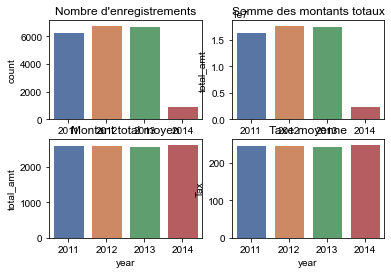

In [6]:
make_fig1(transactions, "year")

Maintenant que nous avons notre fonction, utilisons là pour observer la répartition/distribution des variables.

> Consignes:
> * Appler la fonction ```make_fig1```, pour réaliser un regroupement de la variables ```month``` à partir de la df ```transactions```.
> * Que pouvez vous conclure à partir des graphiques.

   month    cust_id  prod_subcat_code  prod_cat_code   Qty     Rate         Tax    total_amt  count
0     01  320243781              7198           4375  3536   935787  293185.830  3085431.830   1181
1     02  272916267              6312           3862  3010   807874  252534.240  2657622.240   1007
2     03  292229577              6791           4052  3312   865181  281664.180  2964180.180   1078
3     04  269742914              6306           3802  2986   769644  243648.825  2564113.825    995
4     05  271102376              6111           3787  3029   767812  242768.085  2554845.085   1000
5     06  262918003              5946           3622  2947   776101  246365.595  2592704.595    970
6     07  287969563              6404           4002  3049   820161  245667.765  2585360.765   1063
7     08  279177800              6175           3846  3044   800658  248188.185  2611885.185   1030
8     09  287797038              6504           4048  3256   824722  268409.925  2824694.925   1062


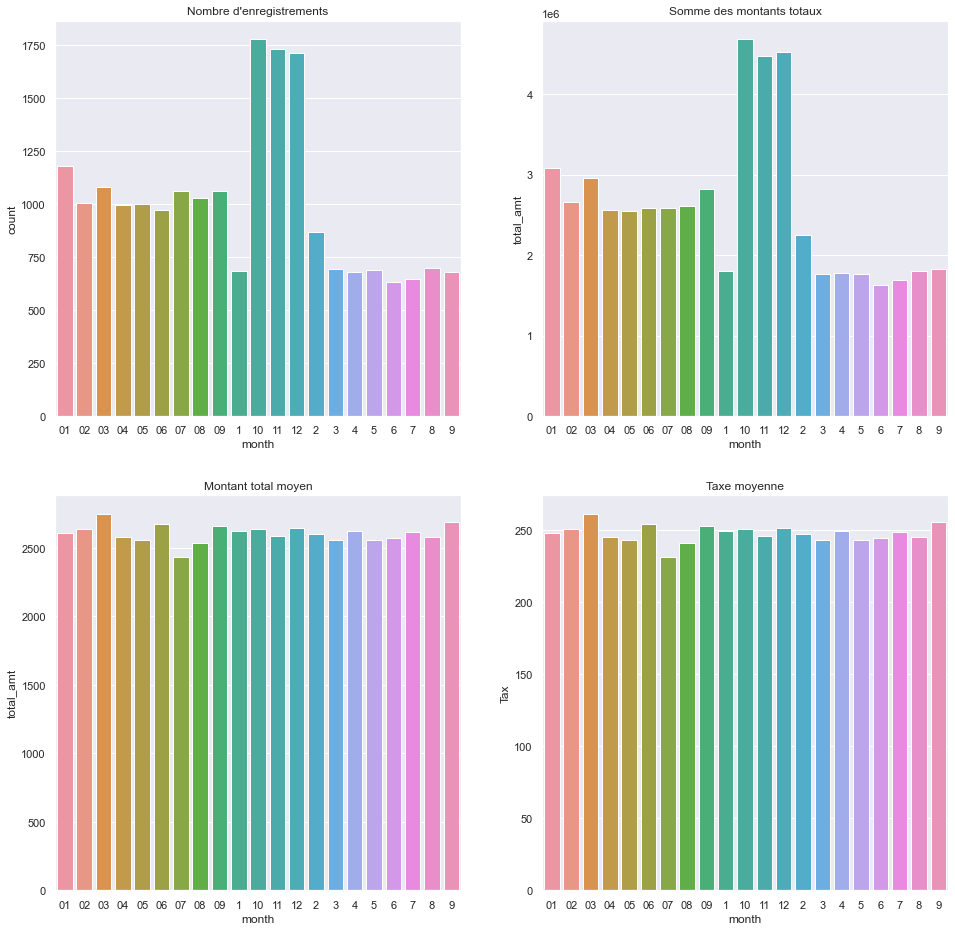

In [7]:
make_fig1(transactions, "month")

Maintenant que nous avons notre fonction, utilisons là pour observer la répartition/distribution des variables.

> Consignes:
> * Appler la fonction ```make_fig1```, pour réaliser un regroupement de la variables ```day``` à partir de la df ```transactions```.
> * Que pouvez vous conclure à partir des graphiques.

   day    cust_id  prod_subcat_code  prod_cat_code   Qty    Rate         Tax    total_amt  count
0    1  186317681              4192           2551  2008  532372  163923.270  1725097.270    688
1   10  201616605              4703           2820  2225  569229  179961.810  1893883.810    744
2   11  175362948              4173           2467  1942  504271  159808.425  1681793.425    647
3   12  182837803              4267           2605  2024  538825  169058.505  1779139.505    675
4   13  179708864              4100           2558  2019  522649  165788.385  1744725.385    663
5   14  182431975              4022           2536  1944  504606  157649.100  1659069.100    673
6   15  188514124              4314           2664  2114  554904  173992.560  1831064.560    696
7   16  175091218              4016           2434  1968  508078  161889.945  1703698.945    646
8   17  185174100              4181           2582  2067  548197  173107.410  1821749.410    683
9   18  187286705             

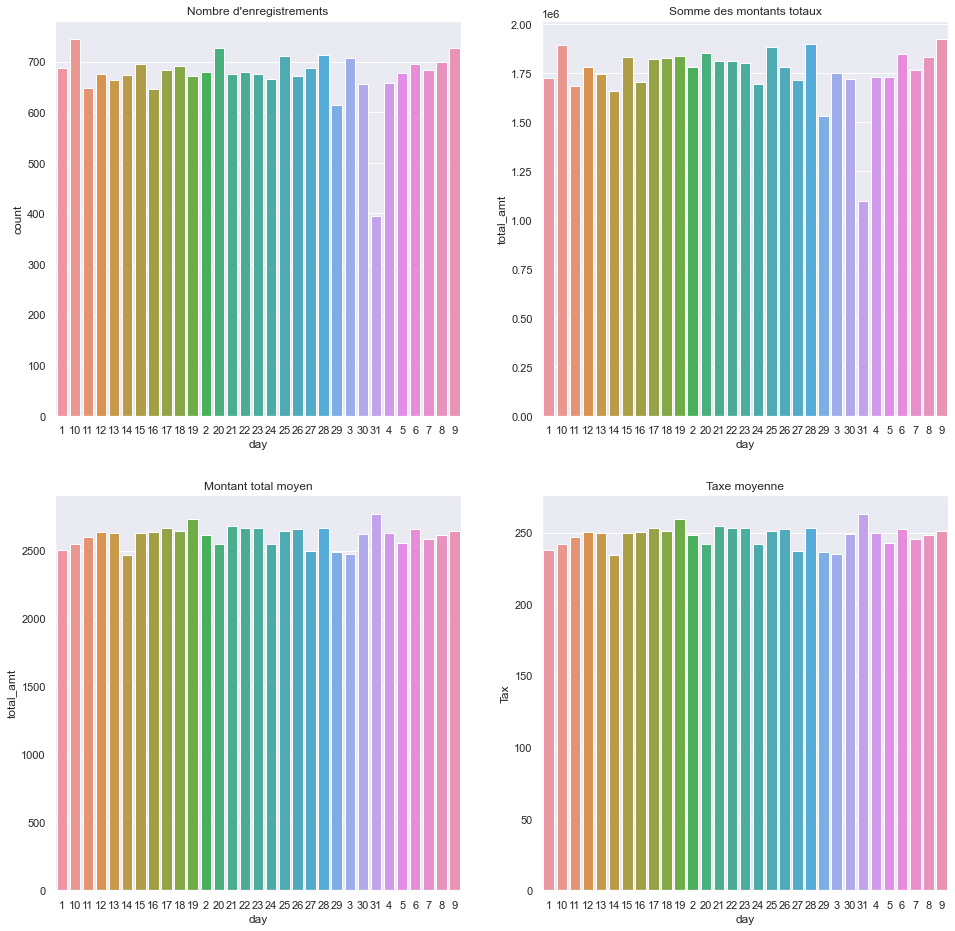

In [8]:
make_fig1(transactions, "day")

Maintenant que nous avons notre fonction, utilisons là pour observer la répartition/distribution des variables.

> Consignes:
> * Appler la fonction ```make_fig1```, pour réaliser un regroupement de la variables ```week_day``` à partir de la df ```transactions```.
> * Que pouvez vous conclure à partir des graphiques.

    week_day    cust_id  prod_subcat_code  prod_cat_code   Qty     Rate         Tax    total_amt  count
0     Friday  822383631             18923          11440  9020  2405539  748852.230  7880778.230   3035
1     Monday  790322898             17809          10901  8810  2265268  713772.780  7511608.780   2916
2   Saturday  802312885             18305          11113  8898  2363031  748717.515  7879360.515   2959
3     Sunday  820198829             18597          11475  9090  2365643  744861.915  7838784.915   3027
4   Thursday  817788131             18430          11426  8870  2354631  734267.625  7727292.625   3017
5    Tuesday  793822211             18057          11025  8961  2298655  738042.900  7767022.900   2929
6  Wednesday  811134031             18405          11145  9052  2354261  745836.105  7849037.105   2993
    week_day        cust_id  prod_subcat_code  prod_cat_code       Qty        Rate         Tax    total_amt  count
0     Friday  270966.600000          6.234926       3

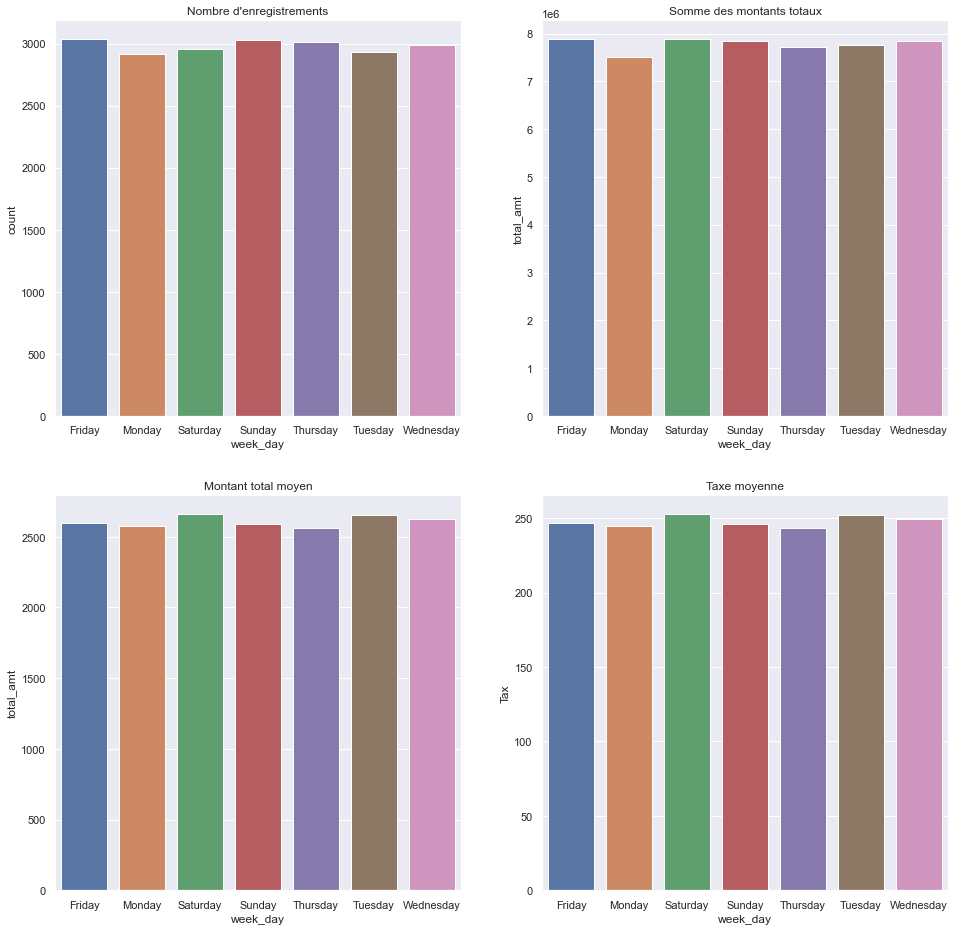

In [9]:
make_fig1(transactions, "week_day")

# <font color='orange'>Fin partie</font>


# Dichotomisation des variables:

Imaginons que nous ayons une variable bimodale dans une df. Cette variable peut décrire le sexe d'un individu et se nommer ```Genre```par exemple :

|Genre|
|---|
|Femme|
|Homme|
|Homme|
|Femme|

Dichotomiser une variable revient à transformer chaque modalité de la variable en une nouvelle variable indicatrice, indiquant si la modalité en question correspond ou non à l'individu. Ainsi, la dichotomisation de la colonne Genre donne deux nouvelles colonnes Genre_Homme et Genre_Femme (si l'on demande le préfixe ```Genre_```):

|Genre	|Genre_Femme	|Genre_Homme|
|-------|---------------|-----------|
|Femme	|1	            |0          |
|Homme	|0	            |1          |
|Homme	|0	            |1          |
|Femme	|1	            |0          |

La dichotomisation est nécessaire pour les **modèles de machine learning de types linéaires**. En effet, ces modèles sont incapables d'interpréter des variables qualitatives. Grâce à la dichotomisation nous avons transformé cette variable qualitative en variable "quantitative" interprétable par un modèle de machine learning --> La variable vaut 1 à chaque fois que c'est vrai.

Cette manipulation porte plus souvent le terme de One Hot Encoding, pour parler de la dichotomisation. De plus, le One Hot Encoding n'est pas l'unique technique pour encoder une variable qualitative.

La fonction ```.get_dummies()``` de pandas permet de transformer facilement une variable qualitative en autant de variables indicatrices qu'elle contient de modalités. On retrouve en argument:
 * ```data``` --> une Series ou un DataFrame à dichotomiser
 * ```prefix``` --> Le préfixe à ajouter aux noms des variables créées. Par défaut, le préfixe sera le nom de la colonne à dichotomiser.

> Consigne:
> * créer la df ```transactions_dum``` dans laquelle les variables ```'prod_cat_code'```, ```'Store_type'```, ```'week_day'``` sont dichotomisées à l'aide de la fonction ```.get_dummies()```.


In [10]:
transactions_dum = pd.get_dummies(data = transactions, columns= ["prod_cat_code","Store_type","week_day"])

# <font color='orange'>Fin partie</font>


# Réduction de dimensions :

Bien souvent, les jeux de données et les problèmes à modéliser comportent de très nombreuses valeurs pour chaque observation. Cela entraine potentiellement 3 problèmes majeurs :
* la quantité de stockage nécessaire pour toutes ces données, 
* la vitesse de l’entrainement du modèle trop faible,
* l'overfitting au moment de l'entrainement --> le modèle apprend très bien sur le set d'entrainement mais n'arrive pas à généraliser son apprentissage. Il n'est donc pas possible d'utiliser le modèle à des fins de prédiction.

Les données mises à disposition sont en réalité très souvent corrélées entre elles. Dans d'autres situations, deux variables identiques peuvent être exprimée dans deux unités différentes. Une seule serait donc nécessaire pour ne pas perde d’information. Identifier ces corrélations permet donc de réduire le nombre de dimensions d'un jeu de données.

La réduction de dimension permet également de visualiser un jeu de données avec des représentations graphiques qui permettent de repérer visuellement des structures qui permettent de déterminer une modélisation adéquate.

Avoir plusieurs milliers de variables (ou plus) pour un nombre parfois restreint d’observations implique que les données sont très éparses, ce qui tend à provoquer l’overfitting. Avoir suffisamment d’observations pour atteindre une densité correcte n’est souvent pas envisageable car le nombre d’observations nécessaires est une fonction exponentielle du nombre de prédicteurs. Il devient alors nécessaire de réduire la dimension du dataset, sans perdre les informations importantes.

Il existe différentes méthodes pour réduire la dimension d'un jeu de données, comme la sélection d'un sous-ensemble des features, la combinaison linéaire de features ou encore d'autres méthodes plus avancées (transformées spectrales...).

Voyons la feature selection et commençons par préparer les données.

> Consignes:
> * importer le fichier 'insurance_features_CNAM.csv' dans une df nommée ```dfins```.
> * réaliser une première exploration des données.

In [11]:
dfins = pd.read_csv("insurance_features_CNAM.csv", sep = ",", header = 0)

def desc_df(df) :
    print("Format de la base : {}".format(df.shape))
    index = df.columns

    cols = ["type","nb_nan","nb_unique","v1","v2","v3"]

    df_base = []

    for i in index :
        x = df[i]

        df_base.append([x.dtypes,x.isna().sum(),x.nunique(),x.iloc[0], x.iloc[1], x.iloc[2]])

    df_return = pd.DataFrame(df_base, columns=cols, index = index)

    return(df_return)

display(dfins.describe(include = "all"))

display(desc_df(dfins))

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Format de la base : (1338, 7)


,type,nb_nan,nb_unique,v1,v2,v3
age,int64,0,47,19,18,28
sex,object,0,2,female,male,male
bmi,float64,0,548,27.9,33.77,33.0
children,int64,0,6,0,1,3
smoker,object,0,2,yes,no,no
region,object,0,4,southwest,southeast,southeast
charges,float64,0,1337,16884.924,1725.5523,4449.462


# Commençons par créer de nouvelles données

Pour le bien de cet exercice, à partir de nos variables, nous allons créer de nouvelles variables. Nous aurons des nouvelles variables qui contiendront une valeur aléatoire et d'autres variables qui contiendront des valeurs constantes.

> Consignes: 
> * Créer une boucle ```for``` qui permet de creer 10 listes indépendantes vides. Les listes devront se nommer ```list_nb``` + numéros de 01 à 10 (--> exemple list_nb01).
>
>
> * Créer une boucle ```for```, qui pour chaque ```list_nb``` que l'on vient de créer : génère autant de nombre aléatoire qu'il y a d'entrée dans ```dfins``` (les valeurs doivent être comprises entre 0 et 10000).
> * Créer 10 colonnes dans la ```dfins``` nommées ```randnb01```à ```randnb10``` qui contiennent les valeurs des listes ```list_nb``` 01 à 10.
> * Créer 8 colonnes dans la ```dfins``` nommées ```const01```à ```const08``` qui contiennent respectivement les valeurs 22.02, 106783.2, 336.006, 1.1, 6789.0821, 572.1, 9901.9 et 71.006.
>
>
> * Afficher les premières lignes de ```dfins```.
> * Afficher les statistiques descriptives de ```dfins```.
>
>
> * Que remarquez vous ?

In [12]:
list_nb = list()

for i in range(10) :
    list_nb.append(list())


for i in dfins.index :
    
    for j in list_nb :
    
        j.append(randint(1,10000))


for i in range(len(list_nb)) :
    j = i + 1
    if j < 10 :
        j = "0" + str(j)
    else :
        j = str(j)
        
    dfins["randnb" + j] = list_nb[i]


constantes = [22.02, 106783.2, 336.006, 1.1, 6789.0821, 572.1, 9901.9 , 71.006]
    
for i in range(8) :
    j = i + 1
    if j < 10 :
        j = "0" + str(j)
    else :
        j = str(j)
        
    dfins["const" + j] = constantes[i]
    
display(dfins.head())

display(dfins.describe())

,age,sex,bmi,children,smoker,region,charges,randnb01,randnb02,randnb03,randnb04,randnb05,randnb06,randnb07,randnb08,randnb09,randnb10,const01,const02,const03,const04,const05,const06,const07,const08
0,19,female,27.900,0,yes,southwest,16884.92400,6868,6782,8870,6954,2114,9792,2185,8644,2187,4356,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006
1,18,male,33.770,1,no,southeast,1725.55230,1081,6916,2682,9933,1475,6735,5259,4236,9340,4685,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006
2,28,male,33.000,3,no,southeast,4449.46200,6757,2972,7749,7349,8480,9113,643,7915,3161,3433,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006
3,33,male,22.705,0,no,northwest,21984.47061,6619,1854,8262,3486,9994,3836,2698,518,6455,9427,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006
4,32,male,28.880,0,no,northwest,3866.85520,4725,1325,3150,7244,4649,67,5085,8320,4991,7222,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006


,age,bmi,children,charges,randnb01,randnb02,randnb03,randnb04,randnb05,randnb06,randnb07,randnb08,randnb09,randnb10,const01,const02,const03,const04,const05,const06,const07,const08
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1338.0000,1.338000e+03,1.338000e+03,1338.000
mean,39.207025,30.663397,1.094918,13270.422265,5014.008969,4947.682362,4935.352765,4941.518685,5067.290732,5039.976084,4858.409567,5096.803438,5061.473094,5047.970105,2.202000e+01,1.067832e+05,3.360060e+02,1.100000e+00,6789.0821,5.721000e+02,9.901900e+03,71.006
std,14.049960,6.098187,1.205493,12110.011237,2935.721882,2894.271453,2923.549668,2898.043755,2817.128545,2880.619544,2900.321322,2884.744460,2900.824253,2812.241831,3.554042e-15,2.911471e-11,5.686467e-14,2.221276e-16,0.0000,1.137293e-13,1.819670e-12,0.000
min,18.000000,15.960000,0.000000,1121.873900,22.000000,15.000000,2.000000,6.000000,19.000000,10.000000,2.000000,1.000000,1.000000,23.000000,2.202000e+01,1.067832e+05,3.360060e+02,1.100000e+00,6789.0821,5.721000e+02,9.901900e+03,71.006
25%,27.000000,26.296250,0.000000,4740.287150,2350.250000,2350.500000,2351.750000,2490.500000,2671.250000,2617.750000,2274.250000,2600.750000,2677.000000,2721.750000,2.202000e+01,1.067832e+05,3.360060e+02,1.100000e+00,6789.0821,5.721000e+02,9.901900e+03,71.006
50%,39.000000,30.400000,1.000000,9382.033000,5001.500000,4987.500000,4891.000000,4871.000000,5104.500000,5029.500000,4809.500000,5153.500000,5020.000000,5057.000000,2.202000e+01,1.067832e+05,3.360060e+02,1.100000e+00,6789.0821,5.721000e+02,9.901900e+03,71.006
75%,51.000000,34.693750,2.000000,16639.912515,7565.000000,7368.500000,7485.750000,7479.250000,7371.750000,7548.500000,7305.250000,7639.500000,7612.750000,7418.500000,2.202000e+01,1.067832e+05,3.360060e+02,1.100000e+00,6789.0821,5.721000e+02,9.901900e+03,71.006
max,64.000000,53.130000,5.000000,63770.428010,9998.000000,9998.000000,9998.000000,9999.000000,9994.000000,9999.000000,9995.000000,9984.000000,9999.000000,9993.000000,2.202000e+01,1.067832e+05,3.360060e+02,1.100000e+00,6789.0821,5.721000e+02,9.901900e+03,71.006


# <font color='orange'>Fin partie</font>


# Encodage des variables

Comme nous l'avons observé dans la première phase exploratoire, nous sommes faces à des variable numériques et catégorielles.

Dans un premier temps, intéressons nous à l'encodage des variables catégorielles.
Il existe toujours plusieurs manières de procéder pour aboutir au même résultat. Par exemple pour aboutir au résultat souhaité, lorsque seules deux occurences existent, la fonction ```.replace()``` de pandas fonctionne très bien. Cependant, imaginons ne catégories qui pourrait prendre 20 valeurs différentes, la fonction ```.replace()``` deviendrait trop fastidieuse. D'autres fonctions d'encoding directment disponibles dans le package scikit learn (```sklearn.preprocessing```) sont plus adaptées (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). 

> Consignes:
> * Utiliser la fonction .replace() pour encoder la variable ```sex```. Les valeurs 'female' et 'male'] seront respectivement remplacées par 1 et 0.
> * Depuis ```sklearn.preprocessing```, importer ```OrdinalEncoder```.
> * Instancier ```ord_enc``` un ```OrdinalEncoder```.
> * A l'aide de la méthode ```.fit_transform()```, transformer la colonne ```'smoker'``` de ```dfins```.
> * A l'aide de la méthode ```.fit_transform()```, transformer la colonne ```'region'``` de ```dfins```.
> * Afficher les 20 premières lignes de dfins.

In [13]:
dfins["sex"] = dfins["sex"].replace(to_replace = {'female': 1, 'male': 0})

from sklearn.preprocessing import OrdinalEncoder as ord_enc

dfins["smoker"] = ord_enc().fit_transform(dfins[["smoker"]])

dfins["region"] = ord_enc().fit_transform(dfins[["region"]])

dfins.head(20)


,age,sex,bmi,children,smoker,region,charges,randnb01,randnb02,randnb03,randnb04,randnb05,randnb06,randnb07,randnb08,randnb09,randnb10,const01,const02,const03,const04,const05,const06,const07,const08
0,19,1,27.900,0,1.0,3.0,16884.92400,6868,6782,8870,6954,2114,9792,2185,8644,2187,4356,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006
1,18,0,33.770,1,0.0,2.0,1725.55230,1081,6916,2682,9933,1475,6735,5259,4236,9340,4685,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006
2,28,0,33.000,3,0.0,2.0,4449.46200,6757,2972,7749,7349,8480,9113,643,7915,3161,3433,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006
3,33,0,22.705,0,0.0,1.0,21984.47061,6619,1854,8262,3486,9994,3836,2698,518,6455,9427,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006
4,32,0,28.880,0,0.0,1.0,3866.85520,4725,1325,3150,7244,4649,67,5085,8320,4991,7222,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006
5,31,1,25.740,0,0.0,2.0,3756.62160,6936,9143,1549,9314,853,9179,1656,6115,1718,6195,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006
6,46,1,33.440,1,0.0,2.0,8240.58960,1430,5483,4769,8311,4020,7452,9531,8907,7566,2610,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006
7,37,1,27.740,3,0.0,1.0,7281.50560,1392,7222,2436,4845,7266,4558,586,8444,7198,2858,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006
8,37,0,29.830,2,0.0,0.0,6406.41070,7252,2785,6772,6732,2759,4485,6231,3114,4987,4317,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006
9,60,1,25.840,0,0.0,1.0,28923.13692,2086,6361,3053,6477,5344,9825,1456,4992,8693,7381,22.02,106783.2,336.006,1.1,6789.0821,572.1,9901.9,71.006


# Séparation des données

L'objectif initial de ce type d'exercice est de prédire la somme payée par un assuré (ici la colonne ```charges```) en fonction de ses caractéristiques mesurées. Nous pourrions facilement imaginer qu'en fait, un algorithme utilise ces mesures pour aider la mise en place d'une tarification.

Dans ce cas, nous allons séparer le jeu de données.

> Consignes:
> * A partir du package ```sklearn.model_selection``` importer ```train_test_split```.
>
>
> * Créer ```data``` qui contient les variables explicatives.
> * Créer ```target``` qui contient la variable cible.
>
>
> * Séparer les données en un jeu d'entrainement contenant 80 des données et un jeu de test. Pour cela, nous utiliserons la méthode ```train_test_split()``` de la bibilothèque ```sklearn.model_selection```.

In [14]:
from sklearn.model_selection import train_test_split

data = dfins.drop(["charges"], axis = 1)

target = dfins["charges"]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Filtration

La filtration est une méthode de réduction de dimension, qui à l'étape du pré-processing des données consiste à sélectionner les variables qui contiennent le plus d'informations, et donc mettre des côté les variables les moins informatives.

En étudiant le résumé statistique de nos données, il est possible de constater que des variables ont une variance nulle ou presque. Si une variable ne varie pas, c'est donc une constante. Une constante ne peut pas être informative pour un modèle. Il faut donc s'en débarasser.

La bibliothèque ```scikitlearn``` présente des outils tels que ```VarianceThreshold()``` qui permettent de détecter et sélectionner automatiquement les features de variance nulle. Ces sélecteurs, comportent alors des méthodes telles que ```.get_support()``` qui permettent de retrouver les variables sélectionnées et celles écartées. La méthode renvoie un tableau indiquant si les variables ont été séletionnées ou non.

> Consignes:
> * Importer le sélecteur ```VarianceThreshold``` depuis la bibliothèque ```sklearn.feature_selection```.
>
>
> * Instancier un sélecteur nommé ```sel```. Ce sélecteur sera de type ```VarianceThreshold```. Le sélecteur aura pour paramètre un **threshold de 1e-6**.
> * Entrainer le sélecteur ```sel```sur les **données d'entrainement**.
> * Créer une variable ```mask``` contenant les données obtenues par la méthode ```.get_support()``` à partir de notre sélecteur ```sel```.
>
>
> * Utiliser le code ci-dessous pour afficher un graphique représentant les valeurs gardées (représentées en **noir**) et celles écartées (représentées en **blanc**)
> ```python
> plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
> plt.xlabel('Feature selection')
> plt.yticks([]);
> ```

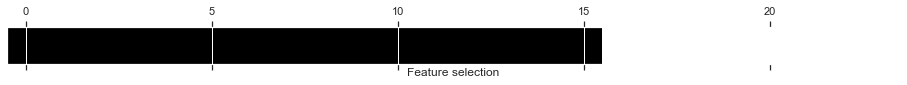

In [15]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(1e-6)

sel.fit(X_train)

mask = sel.get_support()

plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature selection')
plt.yticks([]);

Comme bien souvent, avec scikitlearn, la manière de procéder consiste à entrainer la méthode ou fonction qui nous intéresse sur les données, puis de les transformer ensuite.

Ainsi, le sélecteur ```sel```que nous avons entrainé peut être appliqué sur les données en employant ```sel.transform(*données_d'intéret*)```

Une variante possible (à mettre en place dès le début), est d'employer la méthode ```.fit_transform(*données d'entrainement*)```. Cette méthode permet à la fois d'entrainer et de transformer les données.

> Consignes:
> * Créer deux variables ```X_train_noconst``` et ```X_test_noconst``` qui correspondent respectivement à la transformation de ```X_train``` et ```X_test``` par le sélecteur ```sel```que nous venons d'entrainer.

In [16]:
X_train_noconst = sel.transform(X_train)

X_test_noconst = sel.transform(X_test)

# <font color='orange'>Fin partie</font>



# Methode Wrapper:

Les wrappers ont été introduits par John et al. en 1994. Leur principe est de générer des sous ensembles candidats et de les évaluer grâce à un algorithme de classification. Cette évaluation est faite par le calcul d’un score, par exemple un score d’un ensemble sera un compromis entre le nombre de variables éliminées et le taux de réussite de la classification sur un fichier de test. Un mécanisme supplémentaire de validation croisée est fréquemment utilisé. Le principe de wrappers est de générer un sous ensemble bien adapté à l’algorithme de classification. Les taux de reconnaissance sont élevés car la sélection prend en compte le biais intrinsèque de l’algorithme de classification. Un autre avantage est sa simplicité conceptuelle ; nous n’avons pas besoin de comprendre comment l’induction est affectée par la sélection des variables, il suffit de générer et de tester.

Cependant, trois raisons font que les wrappers ne constituent pas une solution parfaite. D’abord, ils n’apportent pas vraiment de justification théorique à la sélection et ils ne nous permettent pas de comprendre les relations de dépendances conditionnelles qu’il peut y avoir entre les variables. D’autre part la procédure de sélection est spécifique à un algorithme de classification particulier et les sous ensembles trouvés ne sont pas forcément valides si nous changeons de méthode d’induction. Finalement, c’est l’inconvénient principal de la méthode, les calculs deviennent de plus en plus très longs, voir irréalisables lorsque le nombre de variables est très grand.

Pour cet exercice, nous allons utiliser un classifieur: ```LinearRegression()```, c'est un modèle qui demande peu de temps à mettre en place.

La méthode *__Recursive Feature Elimination__* (RFE), est une méthode wrapper, qui à partir d'un classifieur évalue les meilleurs jeux de paramètres. Cette méthode bénéficie également de la fonction ```.get_support()```.

> Consignes:
> * A partir du package ```sklearn.feature_selection``` importer ```RFE```.
> * A partir du package ```sklearn.linear_model``` importer ```LinearRegression```.
>
>
> * Instancier un classifieur ```LinearRegression()``` nommé ```linmodel```.
> * Instancier la méhode ```RFE()``` (nommée ```rfe1```) et prennant comme arguments **l'estimateur** (donc le classifieur déclaré précédemment), le **nombre de variables** à sélectionner (ici fixé à 6), et le paramètre **step** (ici fixé à 1). Ce dernier paramètre indique simplement le nombre de variables à éliminer à chaque itération. Ajouter egalement le parametre **verbose=3** afin de voir la progression de notre algorithme.
> * Entrainer ```rfe1``` sur ```(X_train, y_train)```.
> * Créer une variable ```var_sel``` contenant les données obtenues par la méthode ```.get_support()``` à partir de notre sélecteur ```rfe```.
>
>
> * Utiliser le code ci-dessous pour afficher un graphique représentant les valeurs gardées et celles écartées.
>
> ```python
> plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
> plt.xlabel('Feature selection')
> plt.yticks([]);
> ```

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


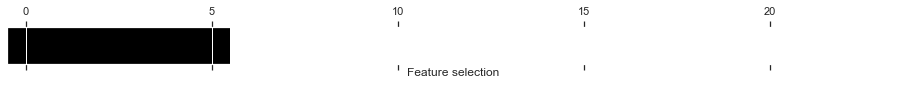

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linmodel = LinearRegression()
rfe1 = RFE(estimator = linmodel, n_features_to_select = 6, step = 1, verbose = 3)

rfe1.fit(X_train, y_train)

var_sel = rfe1.get_support()

plt.matshow(var_sel.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature selection')
plt.yticks([]);

# cycle d'élimination des variables

La méthode ```RFE``` présente une fonction particulièrement utile : ```.ranking_```.

> Consignes:
> * Créer une variable ```elimination``` correspondant à l'application de la fonction ```.ranking_``` au wrapper ```rfe1``` créé précédemment.
> * Selon des instructions similaire à la cellule précédente, afficher un graphique représenant les variables gardées et éliminées (informations contenues dans ```elimination```). Attention, cette fois, en s'appuyant sur les informations disponibles, le graphique sera quelque peu différent : les variables éliminées en premier sont représentées en **noir**. Plus une variable est éliminée tardivement, plus elle est représentée en gris clair. Les variables gardées seront représentées en **blanc**.

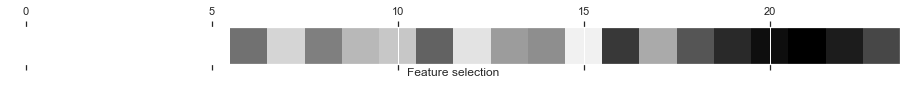

In [18]:
elimination = rfe1.ranking_

plt.matshow(elimination.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature selection')
plt.yticks([]);

# Standardisation

La méthode RFE nous donne déjà d'excellents résultats.
Néanmoins, cette méthode est théoriquement sensible à l'amplitude des variables.
N'oublions pas que nous avons artificiellement créé des variables sans aucun rapport. Lorsque les algorithmes doivent travailler en condition réellees, les choses peuvent être plus délicates.

La standardisation demeure ainsi un processus important, tant pour la sélection des variables, que par la suite, pour la mise au point d'algorithmes de machine learning.

> Consignes:
> * A partir du package ```sklearn.preprocessing``` importer ```StandardScaler```.
> * instancier ```scaler```: un ```StandardScaler```.
> * Entrainer ```scaler``` sur ```X_train``` et ```y_train```.
> * Créer ```X_train_sca```: la résultat de la méthode ```.transform()``` sur ```X_train```.
> * Créer ```X_test_sca```: la résultat de la méthode ```.transform()``` sur ```X_test```.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train, y_train)

X_train_sca = scaler.transform(X_train)

X_test_sca = scaler.transform(X_test)

# Place à la sélection 

Nous allons réaliser à nouveau la sélection des features à partir d'un RFE.

> Consignes:
> * Instancier un classifieur ```LinearRegression()``` nommé ```linmodel```.
> * Instancier la méhode ```RFE()``` (nommée ```rfe2```) et prennant comme arguments **l'estimateur** (donc le classifieur déclaré précédemment), le **nombre de variables** à sélectionner (ici fixé à 6), et le paramètre **step** (ici fixé à 1). Ce dernier paramètre indique simplement le nombre de variables à éliminer à chaque itération. Ajouter egalement le parametre **verbose=3** afin de voir la progression de notre algorithme.
>
>
> * Entrainer ```rfe2``` sur ```(X_train_sca, y_train)```.
> * Créer une variable ```var_sel2``` contenant les données obtenues par la méthode ```.get_support()``` à partir de notre sélecteur ```rfe2```.
>
>
> * Créer une variable ```elimination2``` correspondant à l'application de la fonction ```.ranking_``` au wrapper ```rfe2``` créé précédemment.
>
>
> * Selon des instructions précédentes (*cf.* cellules de code précédentes), afficher un subplot :
>     * de dimensions (16,3)
>     * contenant un premier graphique représenant les variables gardées et éliminées (informations contenues dans ```var_sel2```).
>     * contenant dans un second graphique le détail (la temporalité) de l'élimination des variables (informations contenues dans ```elimination2```).
>
>
> Que constatez vous ?

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


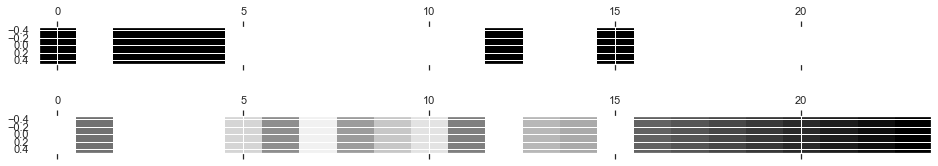

In [20]:
linmodel = LinearRegression()
rfe2 = RFE(estimator = linmodel, n_features_to_select = 6, step = 1, verbose = 3)

rfe2.fit(X_train_sca, y_train)

var_sel2 = rfe2.get_support()

elimination2 = rfe2.ranking_

fig, ax = plt.subplots(2, figsize = (16,3));

ax[0].matshow(var_sel2.reshape(1,-1), cmap = 'gray_r');

ax[1].matshow(elimination2.reshape(1,-1), cmap = 'gray_r');


A priori, nous n'obtenons pas un bon score ! Cette sélection de valeurs semble à priori moins performante que précédemment. Bien entendu, les constantes sont encore très rapidement éliminées, mais il semble y avoir un souci. Que nous allons essayer de régler par la suite.



# <font color='orange'>Fin partie</font>

# Reprenons avec des valeurs propres...

Parfois, en cas de doutes sur ce que nous avons réalisé, il peut être intéressant de repartir sur des données "propres".

> Consignes:
> * Reprendre le code suivant pour recréer le dataset de travail
>
>
> ```python
> dfins = pd.read_csv('insurance_features_CNAM.csv' , sep = ',', header = 0)
> 
> name = "list_nb" # This has to be a string, variables like my_var1, my_var2 will be created.
> value = "[]" # This also has to be a string, even when you want to assign integers! When you want to assign a > string "3", you'd do this: value = "'3'"
> amount = 10 # This must be an integer. This many variables will be created (my_var1, my_var2 ... my_var5).
> 
> for i in range(1, amount+1):
>     if i < 10:
>         command_variable = ""
>         command_variable = name + "0" + str(i) + " = " + value
>     else:
>         command_variable = ""
>         command_variable = name + str(i) + " = " + value
>     exec(command_variable)
>    
>
> for nb in range(len(dfins)):
    list_nb01.append(randint(0, 10000))
    list_nb02.append(randint(0, 10000))
    list_nb03.append(randint(0, 10000))
    list_nb04.append(randint(0, 10000))
    list_nb05.append(randint(0, 10000))
    list_nb06.append(randint(0, 10000))
    list_nb07.append(randint(0, 10000))
    list_nb08.append(randint(0, 10000))
    list_nb09.append(randint(0, 10000))
    list_nb10.append(randint(0, 10000))
>
> dfins['randnb01'] = list_nb01
> dfins['randnb02'] = list_nb02
> dfins['randnb03'] = list_nb03
> dfins['randnb04'] = list_nb04
> dfins['randnb05'] = list_nb05
> dfins['randnb06'] = list_nb06
> dfins['randnb07'] = list_nb07
> dfins['randnb08'] = list_nb08
> dfins['randnb09'] = list_nb09
> dfins['randnb10'] = list_nb10
>
> dfins['const01'] = 22.02
> dfins['const02'] = 106783.2
> dfins['const03'] = 336.006
> dfins['const04'] = 1.1
> dfins['const05'] = 6789.0821
> dfins['const06'] = 572.1
> dfins['const07'] = 9901.9
> dfins['const08'] = 71.006
>
> data = dfins.drop(['charges'], axis = 1)
> target = dfins['charges']
>
> X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)
>
> ```

In [21]:
dfins = pd.read_csv('insurance_features_CNAM.csv' , sep = ',', header = 0)

name = "list_nb" # This has to be a string, variables like my_var1, my_var2 will be created.
value = "[]" # This also has to be a string, even when you want to assign integers! When you want to assign a > string "3", you'd do this: value = "'3'"
amount = 10 # This must be an integer. This many variables will be created (my_var1, my_var2 ... my_var5).

for i in range(1, amount+1):
    if i < 10:
        command_variable = ""
        command_variable = name + "0" + str(i) + " = " + value
    else:
        command_variable = ""
        command_variable = name + str(i) + " = " + value
    exec(command_variable)
   

for nb in range(len(dfins)):
    list_nb01.append(randint(0, 10000))
    list_nb02.append(randint(0, 10000))
    list_nb03.append(randint(0, 10000))
    list_nb04.append(randint(0, 10000))
    list_nb05.append(randint(0, 10000))
    list_nb06.append(randint(0, 10000))
    list_nb07.append(randint(0, 10000))
    list_nb08.append(randint(0, 10000))
    list_nb09.append(randint(0, 10000))
    list_nb10.append(randint(0, 10000))

dfins['randnb01'] = list_nb01
dfins['randnb02'] = list_nb02
dfins['randnb03'] = list_nb03
dfins['randnb04'] = list_nb04
dfins['randnb05'] = list_nb05
dfins['randnb06'] = list_nb06
dfins['randnb07'] = list_nb07
dfins['randnb08'] = list_nb08
dfins['randnb09'] = list_nb09
dfins['randnb10'] = list_nb10

dfins['const01'] = 22.02
dfins['const02'] = 106783.2
dfins['const03'] = 336.006
dfins['const04'] = 1.1
dfins['const05'] = 6789.0821
dfins['const06'] = 572.1
dfins['const07'] = 9901.9
dfins['const08'] = 71.006

data = dfins.drop(['charges'], axis = 1)
target = dfins['charges']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

# Procédons à un nouveau pré-processing.

Vous aurez probablement remarqué que notre dataset original comprend à la fois des variables numériques et catégorielles.
Ainsi, si vous pretez attention à la standardisation que nous avons fait précédemment, nous nous retrouvons avec des valeurs qui n'ont aucun sens ! En effet, le ```StandardScaler``` a aussi réalisé le scaling sur les variables numériques mais catégorielles colle ma région par exemple... ce qui n'a absolument aucun sens.

Dans ce cas, nous allons procéder à un traitement spécifique pour chaqune de nos catégories de variables.
Encore une fois, plusieurs méthodes seraient possibles.

> Consignes:
> * A partir du package ```sklearn.compose``` importer ```ColumnTransformer```.
> * A partir du package ```sklearn.preprocessing``` importer ```StandardScaler``` et ```OrdinalEncoder```. (pas réellement nécessaire car nous les avons déjà importé avant).
> 
> 
> * Créer une variable ```col_names``` contenant les **noms des colonnes** de ```X_train```.
> * Créer une variable ```cat_val_names``` contenant les nomes des colonnes avec variables **catégorielles**. On devrait donc y retrouver : sex, somker et region.
> * Créer une variable ```num_val_names1``` contenant les noms des colonnes de X_train mais qui ne contient pas le nom des colonnes contenues dans ```cat_val_names```.
> * Créer une nouvelle variable ```new_col_names``` qui contient : les noms des colonnes ```num_val_names1``` puis à la suite les noms des colonnes ```cat_val_names```.
> 
> 
> * Créer un objet nommé ```pipeline```: un objet ```ColumnTransformer()```. Ce column transformer prendra en arguments:
>     * l'argument ```transformers = []``` qui contient lui-même (dans cet ordre) **un nom**, **une méthode**, **les colonnes** sur lesquelles travailler. On ajoutera donc :
>         * un ```StandardScaler()``` (nommé ```'num_values'```), qui transformera les colonnes ```num_val_names1```.
>         * un ```OrdinalEncoder()``` (nommé ```'cat_values'```), qui transformera les colonnes ```cat_val_names```.
>     * On ajoutera l'argument ```remainder='passthrough'``` afin de s'assurer que s'il y a d'autres colonnes dans la datframe, elles soient conservées (mais non modifiées).
> 
> 
> * Dans une nouvelle variables nommée ```X_train_sca1```, employer l'objet ```pipeline```, procéder à l'entraînement et à la transformation des données ```X_train```. *La méthode ```.fit_transform()``` peut se révéler très utile pour cette tache...*
> * Dans une nouvelle variables nommée ```X_test_sca1```, employer l'objet ```pipeline```, procéder à **la transformation** des données ```X_test```.
> 
> 
> * <font color='blue'>*Bonus*</font>. La transformation que nous avons mis en place retourne un array. Si on souhaite observer les données issues de notre transformation, il est possible de re-passer par le format dataframe:
>     * Créer une df nommée ```dftest``` avec les valeurs de ```X_train_sca1```. On pourra ajouter l'argument ```columns = new_col_names``` afin de nommer correctement les variables.
>     * Afficher les 5 premières lignes de ```dftest```.

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

col_names = list(X_train.columns)
cat_val_names = ["sex", "smoker", "region"]

num_val_names1 = list(filter(lambda x : x not in cat_val_names, col_names))

new_col_names = [y for x in [num_val_names1,cat_val_names] for y in x]

pipeline = ColumnTransformer(transformers = [('num_values', StandardScaler(), num_val_names1), ('cat_values', OrdinalEncoder(), cat_val_names)], 
                             remainder='passthrough')

X_train_sca1 = pipeline.fit_transform(X_train)
X_test_sca1 = pipeline.transform(X_test)

dftest = pd.DataFrame(X_train_sca1, columns = new_col_names)

dftest.head(5)


,age,bmi,children,randnb01,randnb02,randnb03,randnb04,randnb05,randnb06,randnb07,randnb08,randnb09,randnb10,const01,const02,const03,const04,const05,const06,const07,const08,sex,smoker,region
0,0.129776,0.572590,-0.057631,-1.180184,-0.929649,1.191134,-1.131215,1.027559,-0.847955,1.577805,-0.714651,-0.233809,-1.244687,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
1,-1.498880,-0.400028,-0.890942,0.603670,1.444119,-0.068168,-0.062354,-0.268227,1.451857,1.530992,0.879191,0.685300,1.008501,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.428069,0.392505,-0.890942,0.495450,-0.131057,-0.361666,0.706777,-1.261003,-0.979383,-0.678153,0.433192,0.550385,0.190740,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
3,-0.861580,-1.725513,1.608991,0.733463,-1.490340,-0.773476,0.437196,0.173084,0.476118,-0.440991,-1.366017,-1.607552,1.266778,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,-1.428069,-0.986518,-0.057631,0.082731,0.872948,-0.213162,-0.375405,-0.056954,-1.362178,0.280819,-0.636860,0.368039,0.582414,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0


# Astuce :

Le package scikit-learn possède des fonctions permettant une visualiser les objets comme le ```ColumnTransformer``` que nous venons de créer. Le visuel peut-être parfois intéressant afin faire le point sur les transformations que nous avons demandé.

> Consignes:
> * A partir du package ```sklearn``` importer ```set_config```.
> * Afin d'afficher l'objet ```pipeline``` que nous avons basé sur ```ColumnTransformer```, utiliser le code suivant.
> 
> ```python
> # ajuster la configuration pour afficher un visuer sous forme de "diagramme" à la place du texte habituel.
> set_config(display="diagram")
> # taper simplement le nom de l'objet que vous avez créé
pipeline
> ```

In [23]:
from sklearn import set_config

# ajuster la configuration pour afficher un visuer sous forme de "diagramme" à la place du texte habituel.
set_config(display="diagram")
# taper simplement le nom de l'objet que vous avez créé
pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_values', StandardScaler(),
                                 ['age', 'bmi', 'children', 'randnb01',
                                  'randnb02', 'randnb03', 'randnb04',
                                  'randnb05', 'randnb06', 'randnb07',
                                  'randnb08', 'randnb09', 'randnb10', 'const01',
                                  'const02', 'const03', 'const04', 'const05',
                                  'const06', 'const07', 'const08']),
                                ('cat_values', OrdinalEncoder(),
                                 ['sex', 'smoker', 'region'])])

# Re-commençons la sélection des variables:

Nous allons réaliser à nouveau la sélection des features à partir d'un RFE.

> Consignes:
> * Instancier un classifieur ```LinearRegression()``` nommé ```linmodel```.
> * Instancier la méhode ```RFE()``` (nommée ```rfe3```) et prennant comme arguments **l'estimateur** (donc le classifieur déclaré précédemment), le **nombre de variables** à sélectionner (ici fixé à 6), et le paramètre **step** (ici fixé à 1). Ce dernier paramètre indique simplement le nombre de variables à éliminer à chaque itération. Ajouter egalement le parametre **verbose=3** afin de voir la progression de notre algorithme.
>
>
> * Entrainer ```rfe3``` sur ```(X_train_sca1, y_train)```.
> * Créer une variable ```var_sel3``` contenant les données obtenues par la méthode ```.get_support()``` à partir de notre sélecteur ```rfe3```.
>
>
> * Créer une variable ```elimination3``` correspondant à l'application de la fonction ```.ranking_``` au wrapper ```rfe3``` créé précédemment.
>
>
> * Selon des instructions précédentes (*cf.* cellules de code précédentes), afficher un subplot :
>     * de dimensions (16,3)
>     * contenant un premier graphique représenant les variables gardées et éliminées (informations contenues dans ```var_sel3```).
>     * contenant dans un second graphique le détail (la temporalité) de l'élimination des variables (informations contenues dans ```elimination3```).

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


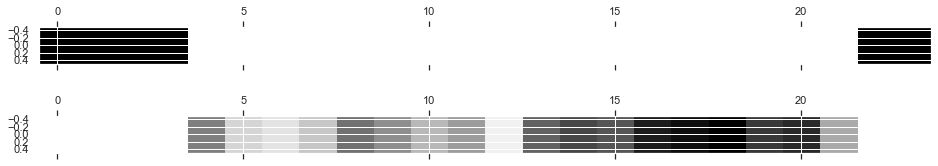

In [24]:
linmodel = LinearRegression()
rfe3 = RFE(estimator = linmodel, n_features_to_select = 6, step = 1, verbose = 3)

rfe3.fit(X_train_sca1, y_train)

var_sel3 = rfe3.get_support()

elimination3 = rfe3.ranking_

fig, ax = plt.subplots(2, figsize = (16,3));

ax[0].matshow(var_sel3.reshape(1,-1), cmap = 'gray_r');

ax[1].matshow(elimination3.reshape(1,-1), cmap = 'gray_r');



# Allons un peu plus loin...

* Vous noterez quelques limites de nos exercices passés :
    - Nous utilisons toujours le même jeu de données pour entrainer notre RFE. Il fait donc des itérations, mais toujours basées sur les même données. Ce n'est pas une pratique saine, car elle entraine souvent le phénomène de sur-apprentissage (*over fitting*).
    - Dans notre cas, nous avons nous même créé les *junk* variables. Dans le quotidien professionnel, ce n'est pas le cas. Il faut alors déterminer le paramètre ```n_features_to_select =``` (à que nous avons fixé à 6), et déterminer le nombre de variables à supprimer n'est pas facile.


Pour s'affranchir de ces limites, la méthode **Recursive Feature Elimination** possède une *méthode* appelée RFECV qui permet d'ajouter la validation croisée. Cette méthode détermine **automatiquement** le nombre de variables à conserver.

> Consignes:
> * A partir du package ```sklearn.feature_selection``` importer ```RFECV```.
> * A partir du package ```sklearn.model_selection``` importer ```KFold```.
>
>
> * Créer ```crossval``` un objet ```KFold()``` qui prendra comme arguments:
>    * Le nombre de fois où le jeu de données est séparé (```n_splits```) : ici ficé à 10
>    * L'état aléatiore (```random_state```) : ici fixé à 2
>    * Le mélange des données (```shuffle```) : ici fixé à True
>
>
> * Instancier la méhode ```RFECV()``` (nommée ```rfecv```) et prennant comme arguments **l'estimateur** (donc le classifieur ```linmodel``` déclaré précédemment) et le **générateur de cross validation** (ici ```crossval```) que nous venons de créer.
>
>
> * Entrainer ```rfecv``` sur ```(X_train_sca1, y_train)```.
> * Créer une variable ```var_sel4``` contenant les données obtenues par la méthode ```.get_support()``` à partir de notre sélecteur ```rfecv```.
>
>
> * Selon des instructions précédentes (*cf.* cellules de code précédentes), afficher un graphique :
>     * de dimensions (13,3)
>     * contenant les variables gardées et éliminées (informations contenues dans ```var_sel4```).
> * Créer un second graphique à l'aide de la fonction ```plt.plot()``` de dimension (12,6), contenant les informations obtenues grâce à l'attribut ```grid_scores_``` de l'objet ```rfecv```.
>
>
> * Il est aussi possible de trouver le nombre de variables conservées dans l'attribut ```n_features_``` de l'objet ```rfecv```. Afficher le nombre de variables conservées.

Nombre de variables conservées : 6


<Figure size 936x216 with 0 Axes>

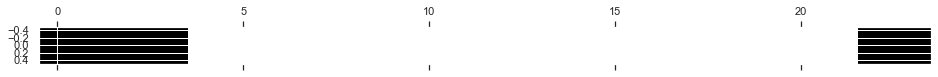

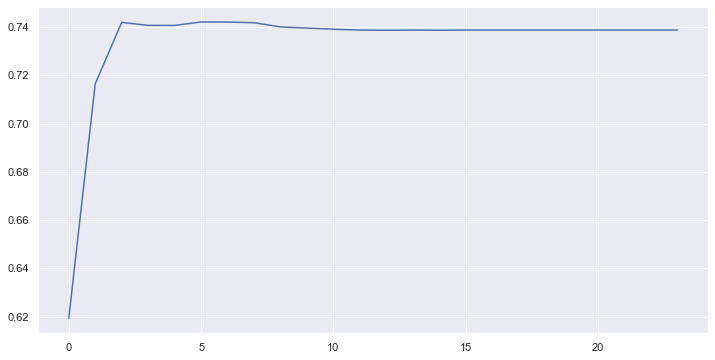

In [25]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

crossval = KFold(n_splits = 10, random_state = 2, shuffle = True)

rfecv = RFECV(estimator = linmodel, cv = crossval)

rfecv.fit(X_train_sca1, y_train)

var_sel4 = rfecv.get_support()


plt.figure(figsize = (13,3));

plt.matshow(var_sel4.reshape(1,-1), cmap = 'gray_r');


plt.figure(figsize=(12,6));

plt.plot(rfecv.grid_scores_);

print("Nombre de variables conservées : {}".format(rfecv.n_features_))

Nous venons de nous intéresser à des moyens de sélectionner (ou exclure) des variables d'intéret. Comme mentionné précédemment, ce processus à un intéret particulier, surtout lorsque le jeu de données auquel nous avons accès est de très grande dimention.

Nous avons mis en place une méthode de sélection basé sur l'optimisation d'un algoritme de regression qui nous intéresse. Cette démarche reste sujette au sur-aprentissage et risque également de présenter des temps de calcul très long, surtout dans le cas ou les données sont très nombreuses. Bien que relativement efficace, ces approches ne sont pas toujours privillégiées.

Par ailleurs, d'autres approches s'appuient sur la mise en place de méthodes qui reposent sur la correction nommée ```Lasso``` (norme L1). Dans une regression linéaire, il est possible d'ajouter des facteurs de correction afin de donner un poids spécifique aux différentes variables. Ces facteurs de correction appelés ```Ridge``` et ```Lasso```, dans le cadre d'une regression linéaire présentent leurs avantages respectifs. Ainsi dans le cadre de la sélection de données, il est possible de s'appuyer sur la **correction ```Lasso```**. En effet, cette dernière peut être nulle. Un facteur correctif nul associé à une variable implique donc l'élimination de cette variable. Nous ne verrons pas d'exemples ici, mais il est toujours intéressant de savoir que cela existe. De la même manière, d'autres algorithmes de machine learning

Pour aller plus loin sur ces questions, n'hésitez pas à consulter [cet article](https://medium.com/analytics-vidhya/feature-selection-embedded-methods-a7940036973f). Le sujet est vaste et peut même parfois être considéré comme une discipline spécifique de la data science.



# <font color='orange'>Fin partie</font>


# Réduction de dimension et analyse en composante principale

Quelles sont les règles du jeu ? Réduire le nombre de variables explicatives tout en conservant les informations contenues dans le dataset. Comment faire cela ? On peut s'amuser à créer un réseau de neurone "autoencoder". Bien qu'une telle approche fonctionne parfois très bien, en fonction du problème auquel on fait face, cela pourrait être comparé à utiliser un bazooka pour tuer un moustique...

Une autre manière d'aborder la réduction de dimension est d'approcher la réduction par le biais de l'analyse en composante principale (ACP... plus souvent connue comme PCA --> *Principal Component Analysis*).

La PCA est une méthode de réduction de données s'appuyant sur l'algèbre linéaire afin de compresser un jeu de données.

Nous allons travailler avec un data set un peu "bateau" : Digits de scikit-learn. Il s'agit de chiffres dessinés à la main par plusieurs personnes. Le but de la manoeuvre est de réussir à classifier automatiquement chaque image à partir de son numéro. Chaque image est ici de toute petite dimension : il s'agit d'images de **8 pixels x 8 pixels**.

<u><font color='blue'>Info n°1</font></u>: Les données seront loadées sous la forme d'un array, dont chaque "entrée" correspond à la suite des valeurs des 64 pixels de notre image. Cependant, en réalité une image ne correspond à une suite de 64 pixels. Une image est plutot une matrice de X pixels par X pixels. Afin de transformer un array en une matrice, la fonction ```.reshape()``` de numpy est particulièrement utile.

```python
a = np.arange(6).reshape((3, 2))

# a Would return:
array([[0, 1],
       [2, 3],
       [4, 5]])
```

<u><font color='blue'>Info n°2</font></u>: vous noterez que nous ne nous arretons pas réellement sur l'analyse exploratoires de nos données... Ici nous travaillons avec un set de données très connu et très "normé", simplement afin de démontrer la mise en oeuvre de l'algorithme qui nous intéresse.


> Consignes:
> * A partir du package ```sklearn.datasets``` importer ```load_digits```.
> * Créer les variables ```X``` et ```y``` à partir du package ```load_digits```. Utiliser le paramètre ```return_X_y=True``` afin de récupérer direcement deux objets : données et cible.
> * Afficher les dimensions de ```X```. Vous pourrez constater que chaque entrée comprend bien les 64 valeurs des pixels.
> * Afficher la première image. La fonction ```.imshow()``` de ```matplotlib.pyplot``` peut être très utile. Cett fonction prend notament en argument une la matrice des pixels à afficher et une colormap (afin d'indiquer quelles couleurs utiliser). Parmi les colormap à renseigner, vous pouvez vous appuyer sur : https://chrisalbon.com/code/python/basics/set_the_color_of_a_matplotlib/. Nous choisirons ici les niveaux de gris.

(1797, 64)


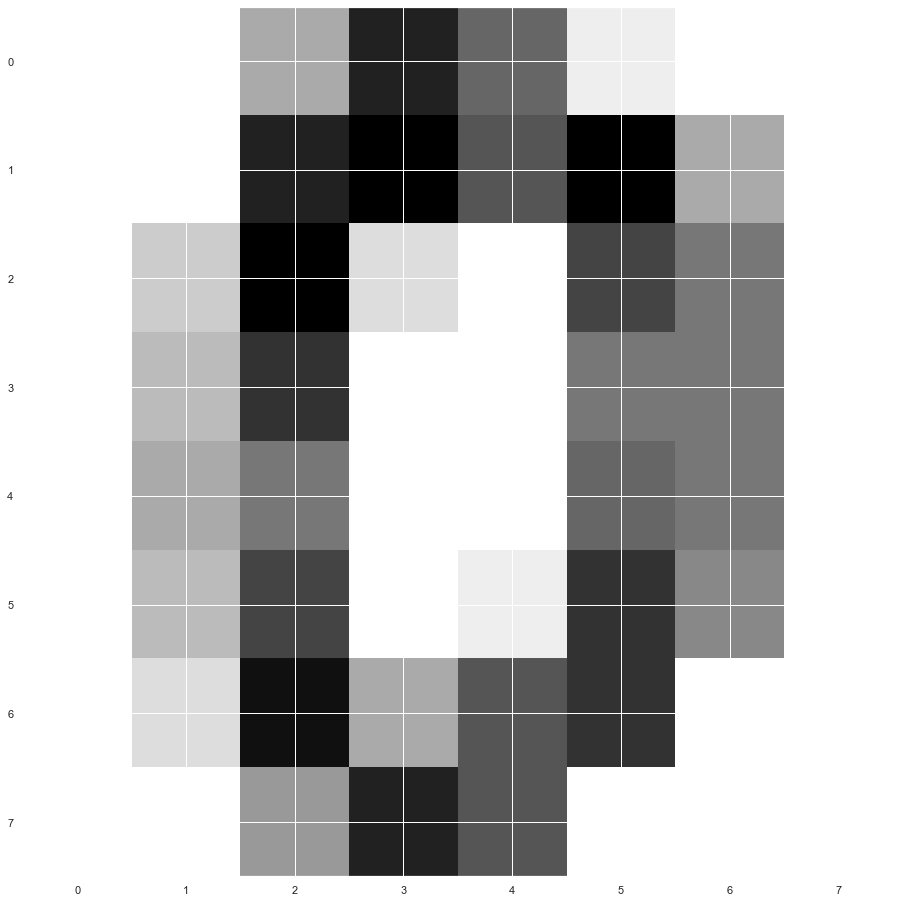

In [48]:
from sklearn.datasets import load_digits

X,y = load_digits(return_X_y=True)

print(X.shape)

plt.imshow(X[0].reshape((8,8)), cmap=plt.cm.binary);

# C'est parti pour la première PCA

La PCA consiste à résumer l’information contenue dans un jeu de données en un nombre réduit de variables : ce sont les **Composantes Principales**.

Dans le cadre d'une représentation graphique d'un jeu de données, le cerveau humain n'est capable de se représenter efficacement que 2 dimensions.

Dans un premier temps, nous allons donc réaliser une PCA avec seulement **2 composantes principales** afin de visualiser une réduction possible de notre jeu de données.

> Consignes:
> * A partir du package ```sklearn.decomposition``` importer ```PCA```.
> * Instancier un objet ```pca1``` à partir de ```PCA``` que nous venons d'importer, avec comme argument **2 composantes**.
> * Créer un array ```pca2compo``` par le biais de **l'ajustement + de la transformation** des donnés ```X``` par notre ```pca1```. Dans cet array chaque entrée disposera de 2 "colonnes" : la première puis la seconde composante principale.
> * A partir de ```pca2compo``` afficher un joli graphique représentant la projection de vos 2 composantes principales. Les points devront être colorés selon leur classe d'appartenance (chaque numéro). Votre graphique doit comporter: titre, légende et labels sur les axes.

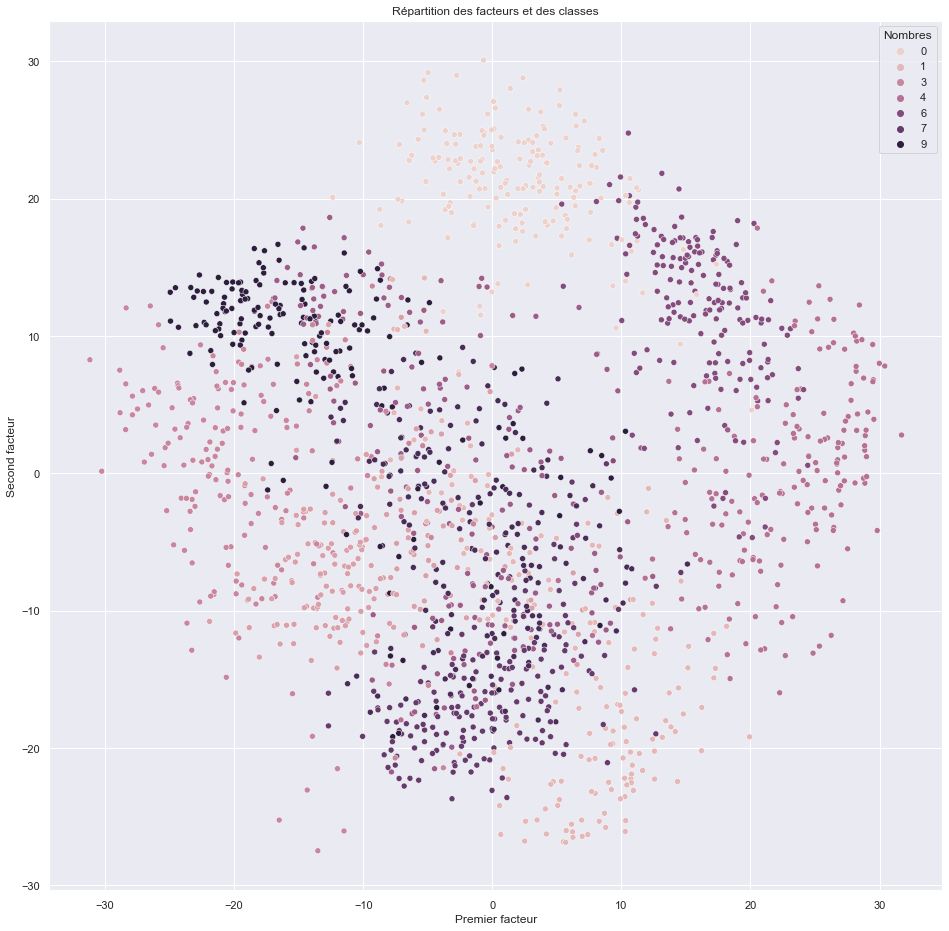

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pca1 = PCA(n_components=2)

pca2compo = pca1.fit_transform(X)

X2 = pd.DataFrame(pca2compo)

X2["y"] = y

p = sns.scatterplot(x = 0, y = 1, data = X2, hue = "y");

p.set(xlabel = "Premier facteur", ylabel = "Second facteur");

p.set_title('Répartition des facteurs et des classes');

plt.legend(title="Nombres");


Nous avons une première "séparation" des données. Nous pouvons quand même constater que certains chiffres ségrègent ensemble. La séparation n'est pas encore particulièrement nette et le nuage de points reste encore dense.

# Conservons nous toute l'information ?

Nous venons de réduire notre jeu de données comprenant 64 variables à seulement 2 variables. <font color='red'>C'est très avantageux !</font> Néanmois, nous pouvons nous poser une question : avons nous réussi à conserver l'information contenue dans notre jeu de données initial ?

Nous avons de la chance, notre objet ```pca1```possède un attribut ```explained_variance_ratio_```qui calcule la part de la variance qui est expliquée pour **chaque** composante de notre PCA : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

> Consignes:
> * Afficher la part **totale** de la variance expliquée par notre PCA.
>
>
> Qu'en pensez vous ?

In [54]:
pca1.explained_variance_ratio_.sum()

0.28509364823687344

Nous pouvons constater que notre PCA à **2 composantes principales** nous permet de commencer à approcher une visualisation segmentée de notre jeu de données. Cependant, le fait de ne conserver que ces deux composantes provoque une perte drastique d'information.


# <font color='orange'>Fin partie</font>


# Comment se comporte notre PCA ?

En créant un nouvel objet PCA sans spécifier d'arguments on peut observer comment se comporte la réduction de dimention, et surtout comment est conservée l'information de notre jeu de données en fonction du nombre de composantes principales.

> Consignes:
> * Instancier un objet ```pca2``` à partir de ```PCA()```. Ici nous ne spécifieront aucun arguments.
> * Entrainer ```pca2``` sur nos données ```X```.
> 
> 
> * Afficher un graphique représentant le **cumul total** de la variance expliquée de notre jeu de données en fonction du nombre de composantes. N'oubliez pas la légende des axes.
> * Afficher en plus une ligne horizontale à 0.9 (--> représentant donc 90% de conservation de l'information).


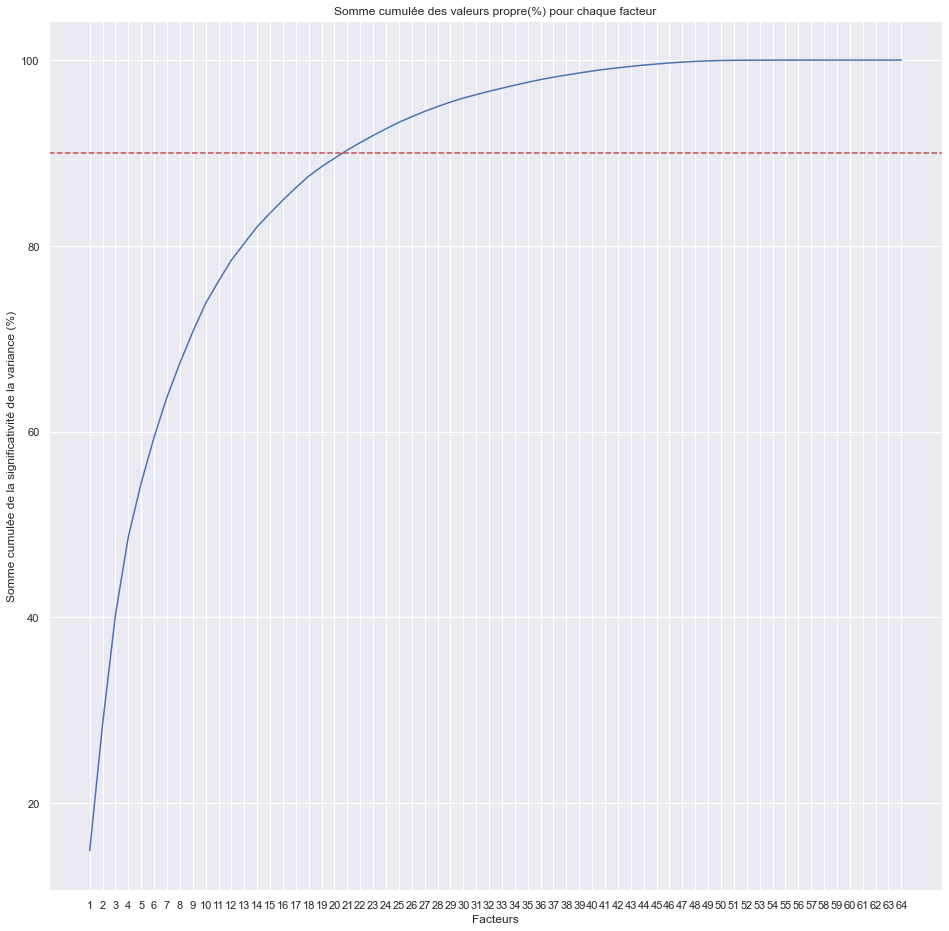

In [63]:
pca2 = PCA()

p = X.shape[1]

pca2compo = pca2.fit_transform(X)

nb_facteurs = pca2.n_components_

# Cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(pca2.explained_variance_ratio_)*100);
plt.title("Somme cumulée des valeurs propre(%) pour chaque facteur");
plt.ylabel("Somme cumulée de la significativité de la variance (%)");
plt.xlabel("Facteurs");
plt.xticks(np.arange(1,nb_facteurs+1)); 
plt.axhline(y=90, color = "r", linestyle = "--");






# Réduisons réellement les dimensions :

Comme vous l'avez vu, la réduction à 2 dimensions permet de visualiser plus clairement notre jeu de données, mais réduit bien trop l'information.

La PCA peut être paramétrée différemment. A la place de spécifier un nombre de composantes principales à conserver (nombre entier > 1), en utilisant le même paramètre, on peut spécifier la part de variance expliquée à conservée (qui sera donc un nombre décimal compris entre 0 et 1). Dans ces conditions, il est d'usage de conserver 90% de la variance expiquée par les nouvelles variables. C'est l'usage, cela ne veut pas dire que c'est une règle absolue... cela fonctionne habituellement plutot bien, après, c'est à vous de juger...!

Nous avons parlé de l'attribut ```explained_variance_ratio_``` des instances ```PCA()```. Pour rappel, cet attribut calcule la part de la variance qui est expliquée pour **chaque** composante de notre PCA. Il existe aussi l'attribut ```n_components_``` qui retourne simplement le **nombre de composantes** retenues par la PCA.

<u><font color='red'>Attention !</font></u> Jusqu'à présent nous n'avons pas standardisé les données. Pourquoi ? Nous travaillons sur des pixels dont les valeur (sur de l'encodage 8 bits) sont tous compris entre 0 et 255. Une standardisation serait donc inutile étant donnée que les valeurs sont déjà toutes sur la même échelle. Dans le cas d'autres set de données, cette standardisation serait obligatoire !

> Consignes:
> * Instancier un nouvel objet ```PCA()``` nommé ```pca3```, avec comme argument ```n_components=0.9```.
> * Réaliser l'entrainement et la transformation des données ```X``` par notre objet ```pca3```.
> * Afficher le cumul de la variance expliquée par notre modèle. **Qu'en pensez vous ?**
> * Afficher le nombre de composantes retenues par le modèle.

Nombre de composantes retenues : 21


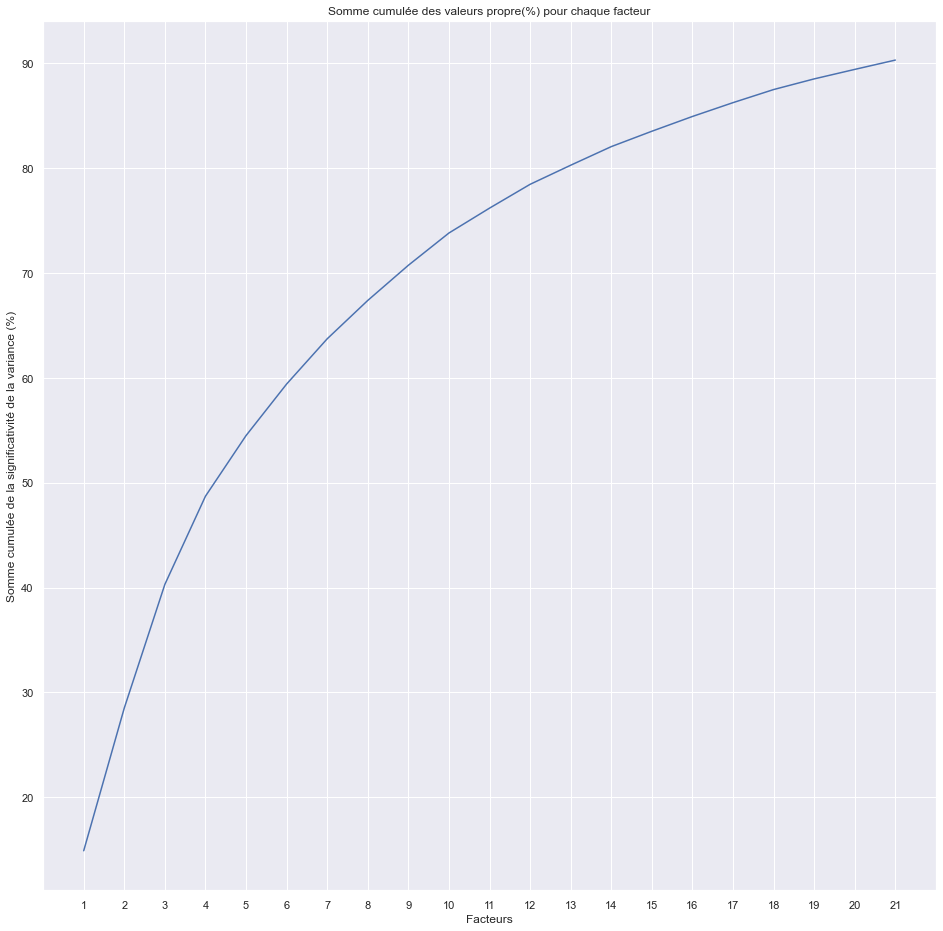

In [56]:
pca3 = PCA(n_components=0.9)

pca3compo = pca3.fit_transform(X)

nb_facteurs = pca3.n_components_

# Cumul de variance expliquée
plt.plot(np.arange(1,nb_facteurs+1),np.cumsum(pca3.explained_variance_ratio_)*100);
plt.title("Somme cumulée des valeurs propre(%) pour chaque facteur");
plt.ylabel("Somme cumulée de la significativité de la variance (%)");
plt.xlabel("Facteurs");
plt.xticks(np.arange(1,nb_facteurs+1));

print("Nombre de composantes retenues : {}".format(nb_facteurs))


# <font color='orange'>Fin partie</font>

# Allons un cran plus loin...

Mainentant que nous avons réalisé notre PCA, nous savons qu'en gardant 21 composantes principales, nous conservons 90% de l'information de notre jeu de données.
En d'autres termes, avec 21 variables nous pouvons théoriquement continuer à expliquer notre variable cible. C'est quand même très avantageux d'être en mesure de réduire par 3 le jeu de données.

Mais si nous grillons quelques étapes, nous pouvons essayer tout de suite de réaliser une classification !

Nous avons précédemment importé ```train_test_split``` à partir du package ```sklearn.model_selection```. Nous ne recommencerons pas...

> Consignes:
> * A l'aide de la fonction ```train_test_split()```, créer les variables ```X_train1```, ```X_test1```, ```y_train1``` et ```y_test1```. Le set d'entrainement devra comporter 80% des valeurs. Imposer un état aléatoire à 123 et mélanger les données.

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

# Reprenons des données PCA propres

Par simple mesure de précaussion, nous allons reprendre des données des PCA propres. C'est vraiment "au cas où" et n'a pas de réel intéret si l'on est sur de ses données.

> Consignes:
> * Instancier un nouvel objet ```PCA()``` nommé ```pca4```, avec comme argument ```n_components=0.9```.
> * Réaliser l'entrainement et la transformation des données ```X_train1``` par notre objet ```pca4```.
> * Réaliser la transformation des données ```X_test1``` par notre objet ```pca4```.

In [64]:
pca4 = PCA(n_components=0.9)

X_train_pca = pca4.fit_transform(X_train1)

X_test_pca = pca4.transform(X_test1)


# Classifions !

Pour cet exercice, nous allons faire appel à un classifieur simple : un *Support Vector Machine (SVM)*. Pour en apprendre plus : https://fr.wikipedia.org/wiki/Machine_%C3%A0_vecteurs_de_support

Les paramètres importants pour ces modèles sont :
* le paramètre de régularisation **C**, 
* le noyau (**kernel**) à utiliser, principalement linear, rbf ou poly, et,
* **gamma** le coefficient pour les noyaux rbf, poly et sigmoid : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

La fonction ```.score()``` du classifier retourne l'accuracy. Elle prend  pour arguments **les données de tests** et **les labels tests** (la cible).

> Consignes:
> * A partir du package ```sklearn.svm``` importer ```SVC```.
> * A partir du package ```sklearn.metrics``` importer ```confusion_matrix``` et ```classification_report```.
>
>
> * Instancier 2 classifiers ```svc1```et ```svc2```, tous les deux à partir de ```SVC()```. Les paramètres (qui sot communs) sont : ```C=1``` et ```kernel='linear```.
> * Entrainer ```svc1``` et ```svc2``` respectivement sur 1) les **données réduites** issues de la PCA et 2) sur les **données sources**.
>
>
> * A l'aide de la fonction ```.score()```, afficher le score respectif de chacun des classifiers. Attention aux données que vous renseignez (--> aux arguments de la fonction score) !

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

svc1 = SVC(C=1, kernel="linear")
svc2 = SVC(C=1, kernel="linear")

svc1.fit(X_train_pca, y_train1)
svc2.fit(X_train1, y_train1)

print("Score avec l'ACP : {}".format(svc1.score(X_test_pca, y_test1)))
print("Score sans l'ACP : {}".format(svc2.score(X_test1, y_test1)))


Score avec l'ACP : 0.9583333333333334
Score sans l'ACP : 0.9777777777777777


# <font color='orange'>Fin partie</font>


# Quelles sont les performances de la classification

Nous venons de voir que notre classification présente un score tout à fait respectable ! L'utilisation des données réduite provoques certes une faible perte de performance, mais sur des jeux de donées beaucoup plus conséquents, cette faible perte de performances peut se faire au profit d'une rapidité cruciale (que nous n'avons pas pu constater ici... car notre jeu de donées est limité). De plus, dans certaines conditions, l'utilisation de la PCA peut même aboutir à un gain de performances !

Bien que la fonction ```.score()``` soit très utile, il est aussi possile d'aller plus loin dans la compréhension des performances de notre modèle.
Pour cela, nous allons utiliser 3 étapes/outils : 1) **la prédiction** sur nos données de tests, 2) **le rapport de classification** et 3) **la matrice de confusion**. 

Les rapports de classification et la matrice de confusion prennent tous les deux en arguments :
1. les classes réelles
2. les classes prédites par le modèle

Le rapport de classification se compose de plusieurs scores dont [l'accuracy, la précision, le rappel et le score f1](https://inside-machinelearning.com/recall-precision-f1-score/).

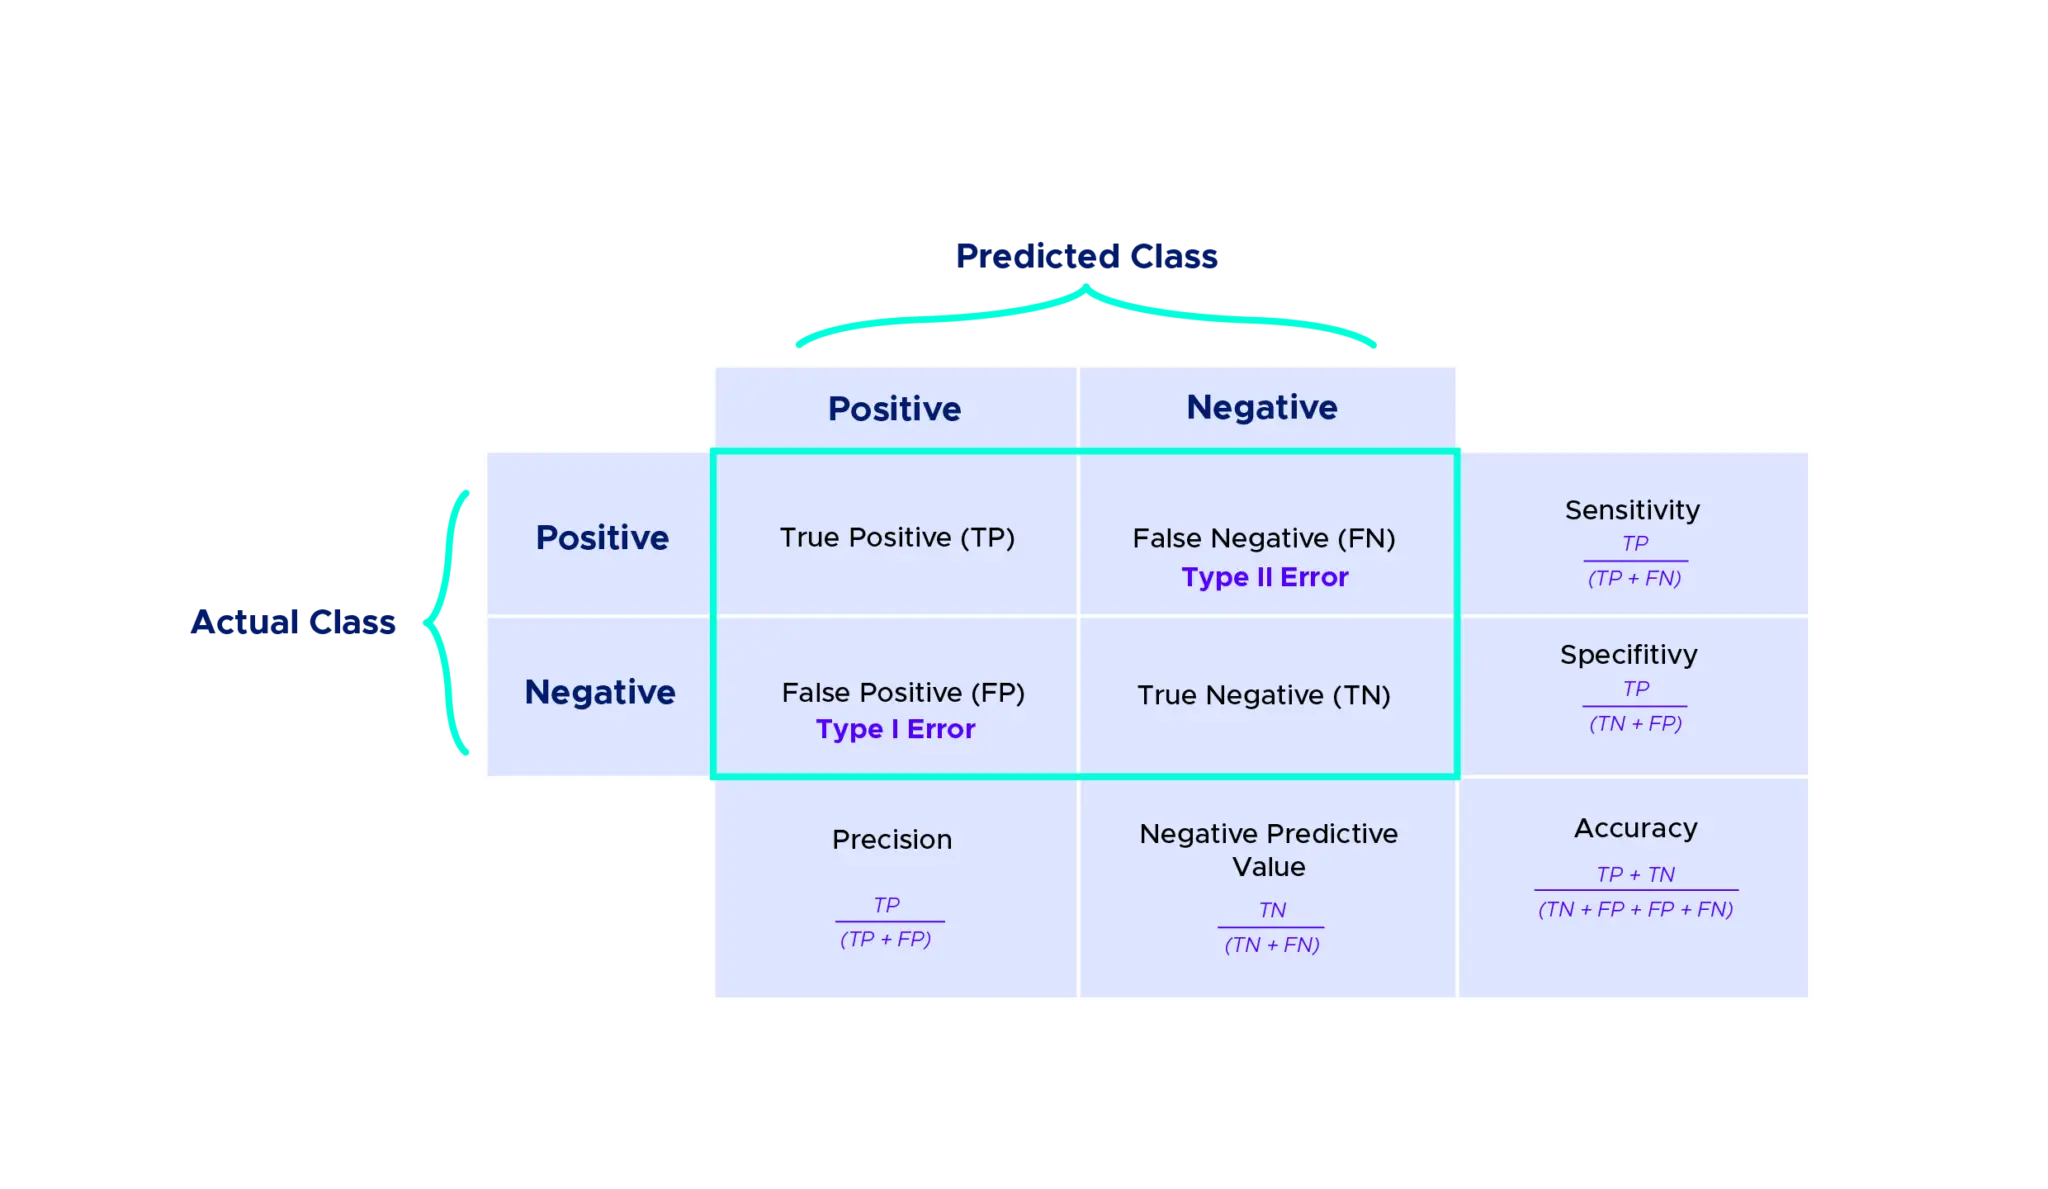

Quelques mots très importants sur ces scores ! notre exemple : On cherche à déterminer qui sont les personnes saines (négatif) ou malades (positif).
* Le Vrai Négatif (<font color='green'>**VN**</font>) : c'est quand on prédit **bien** la classe "négative". Le VN c'est donc les cas sains que nous avons bien identifiés. Tout va bien
* Le Vrai Positif (<font color='green'>**VP**</font>) : c'est quand on prédit **bien** la classe "Positive". Le VP c'est donc les cas malades que l'on a bien détecté. Tout va bien.
* Le Faux Positif (<font color='red'>**FP**</font>) : C'est quand on prédit **mal** la classe "négative". Le FP c'est donc quand on prédit qu'une personne est malade, mais qu'en réalité elle est saine... C'est pas génial, mais pas dramatique... quand on s'intéresse plutot à une action commerciale, on vient de dépenser de l'argent inutilement... pas top quand même.
* Le Faux Négatif (<font color='red'>**FN**</font>) : C'est quand on prédit **mal** la classe "positive". Le FN c'est donc quand on prédit qu'une personne saine alors qu'elle est malade ! Là on passe à coté de l'action à mener. Quand on s'intéresse à un churner, on vient de passer à coté et on ne mène aucune action pour le conserver.

En fonction de la problématique souhaitée, on peut souhaiter minimiser les <font color='red'>**FP**</font> ou les <font color='red'>**FN**</font>.

Maintenant on utilise des métriques pour combiner ces scores et avoir une idée de la performance de classification:
* <u>La précision</u>, c'est : La proportion de vrais positifs parmi toutes les predictions positives du modèle = <font color='green'>**VP**</font> **/ (** <font color='green'>**VP**</font> **+** <font color='red'>**FP**</font>**)**.
* <u>Le rappel</u>, c'est : la proportion d'obsrevations réellement positives qui ont été correctement classifiées positives par le modèle = <font color='green'>**VP**</font> **/ (** <font color='green'>**VP**</font> **+** <font color='red'>**FN**</font>**)**.
* <u>L'accuracy</u>, c'est : la proportion d'observation correctement classifiée : **(**<font color='green'>**VP**</font> **+** <font color='green'>**VN**</font> **) / (** <font color='green'>**VP**</font> **+** <font color='green'>**VN**</font> **+** <font color='red'>**FP**</font> **+** <font color='red'>**FN**</font>**)**.
* <u>Le f1-score</u>, c'est : une manière de prendre en compte à la fois la précision et le rappel = **2*((rappel * précision) / (rappel + précision))**.

> Consignes:
> * A partir du package ```sklearn.metrics``` importer ```confusion_matrix``` et ```classification_report```.
>
>
> * Dans des variables nommées ```y_pred1``` et ```y_pred2``` prédire les données issues respectivement des classifiers ```svc1``` et ```svc2```.
> 
> 
> * Pour chacune de nos prédictions ```y_pred1``` et ```y_pred2```, afficher le rapport de classification à l'aide de la fonction ```classification_report()```.
> 
> 
> * Créer ```conf_matrix1``` et ```conf_matrix2```, les matrices de confusion issues de la confrontation des ```y_pred1``` et ```y_pred2``` avec les observations réelles.

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred1 = svc1.predict(X_test_pca)
y_pred2 = svc2.predict(X_test1)

print(classification_report(y_test1,y_pred1))

print("\n",classification_report(y_test1,y_pred2))

conf_matrix1 = confusion_matrix(y_test1,y_pred1)
conf_matrix2 = confusion_matrix(y_test1,y_pred2)

print("\n",conf_matrix1)
print("\n",conf_matrix2)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.83      1.00      0.91        34
           2       1.00      1.00      1.00        36
           3       0.94      1.00      0.97        33
           4       0.95      0.98      0.96        42
           5       1.00      0.89      0.94        37
           6       1.00      0.95      0.98        43
           7       0.94      1.00      0.97        31
           8       1.00      0.81      0.90        37
           9       0.93      0.96      0.95        28

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.87      1.00      0.93        34
           2       1.00      1.00      1.00        36
           3       0.9

# Mettons de la joie dans nos visualisations...

Vous pourrez constater que la matrice de confusion est informative mais qu'elle n'est pas très jolie...

> Consigne:
> * Lancer le code ci-dessous afin de créer une fonction qui nous permettra, à partir d'un vecteur contenant les classes à identifier, et d'une matrice de confusion, d'afficher une jolie matrice de confusion.
> 
> ```python
>import itertools
>
>def print_nice_conf_matrix(y, cnf_matrix):
>    '''
>    Fonction dediee a rendre une jolie matrice de confusion a partir de :
>        - y : un array contenant les classes pour la classification. Sert uniquement a compter le nombre de classes.
>        - cnf_matrix : la matrice de confusion qui nous interesse.
>    '''
>    classes = range(0,(len(np.unique(y))))
>    
>    plt.figure()
>    
>    plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
>    plt.title("Matrice de confusion")
>    plt.colorbar()
>    tick_marks = np.arange(len(classes))
>    plt.xticks(tick_marks, classes)
>    plt.yticks(tick_marks, classes)
>    
>    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
>        plt.text(j, i, cnf_matrix[i, j],
>                 horizontalalignment = "center",
>                 color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")
>    
>    plt.ylabel('Vrais labels')
>    plt.xlabel('Labels prédits')
>    plt.show()
> ```


In [35]:
import itertools

def print_nice_conf_matrix(y, cnf_matrix):
   '''
   Fonction dediee a rendre une jolie matrice de confusion a partir de :
       - y : un array contenant les classes pour la classification. Sert uniquement a compter le nombre de classes.
       - cnf_matrix : la matrice de confusion qui nous interesse.
   '''
   classes = range(0,(len(np.unique(y))))
   
   plt.figure()
   
   plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
   plt.title("Matrice de confusion")
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes)
   plt.yticks(tick_marks, classes)
   
   for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
       plt.text(j, i, cnf_matrix[i, j],
                horizontalalignment = "center",
                color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")
   
   plt.ylabel('Vrais labels')
   plt.xlabel('Labels prédits')
   plt.show()

Maintenant que la fonction est définie, profitons en pour l'utiliser.

> Consignes:
> * A l'aide de la fonction ```print_nice_conf_matrix()``` que nous venons de créer, afficher la matrice de confusion ```conf_matrix1```. Attention aux arguments.
> * A l'aide de la fonction ```print_nice_conf_matrix()``` que nous venons de créer, afficher la matrice de confusion ```conf_matrix2```. Attention aux arguments.

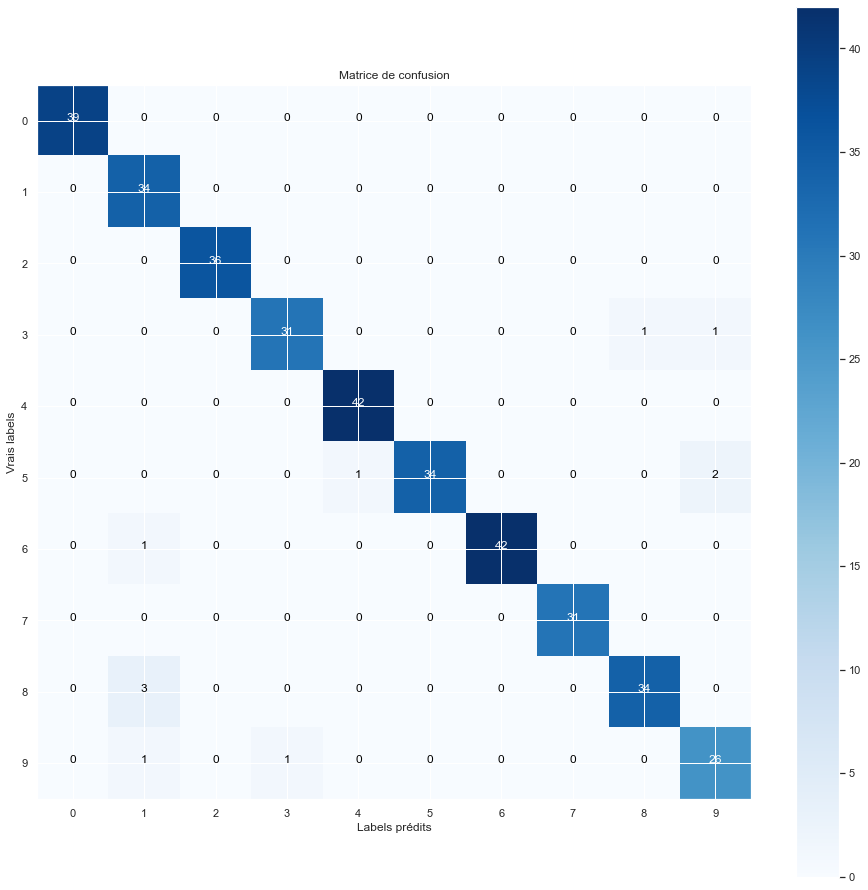

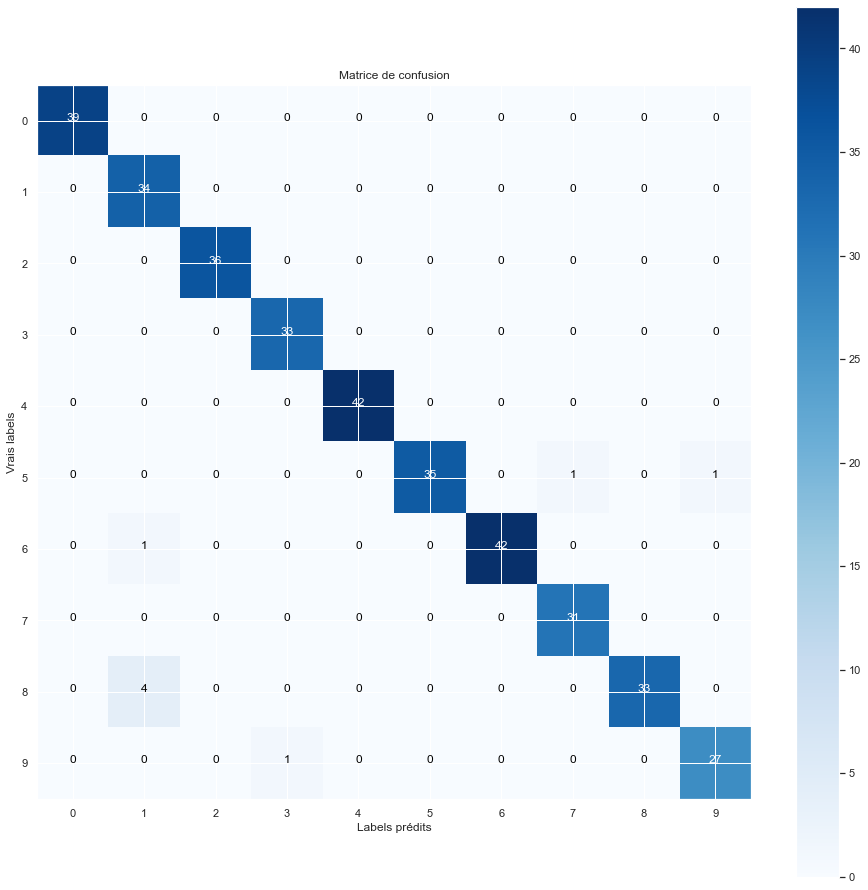

In [36]:
print_nice_conf_matrix(y_test1, conf_matrix1)

print_nice_conf_matrix(y_test1, conf_matrix2)

# <font color='orange'>Fin partie</font>

# Algorithme t-SNE

L'algorythme t-SNE est né d'un besoin grandissant de <u><font color='red'>**visualiser**</font></u> des jeux de données dont le nombre de variables explose littéralement ! En effet, essayez de réaliser une visualisation de type `.pairplot()` avec 20 variables différentes... cela sera compliqué ! Maintenant imaginez le challenge avec 100 variables.... et considérez le avec 2500 variables !

Quand bien même ce serait faisable, un pair plot de 2500 variables différentes ne ferait pas ressortir d'associations non linéaires entre plusieurs variables.

Votre situation: vous êtes faces à un jeu de donnés pour lequel vous ne disposez que de peu d'informations. Vient le moment d'explorer un peu ces données. Dans votre flow expérimental, vous pourriez souhaiter essayer de visualiser les interactions entre vos données, histoire de vous procurer un "feeling" sur comment vous allez pouvoir aborder le problème.

**Attention t-SNE n'est pas une technique mathématique, mais plutot probabiliste. Cela implique notamment qu'on ne peut globalement pas se servir de cette approche pour nourrir un algorithme de classification par exemple.**

### Implémentation de t-SNE
La description de l’implémentation de la réduction de dimension par l’algorithme t-SNE se trouve dans
[TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

Le nombre de dimensions de l’espace réduit est spécifié dans le paramètre `n_components`, comme dans le cas de l’analyse en composantes principales. Par défaut, scikit-learn projette les données dans un espace bidimensionnel à des fins de visualisation (`n_components=2`) mais il est bien entendu possible de choisir un espace de n’importe quelle dimension.

Le paramètre le plus important de t-SNE est **la perplexité**, définie par la valeur du paramètre `perplexity`. Pour simplifier, augmenter la perplexité renforce l’importance accordée à *la structure globale* du jeu de données, tandis qu’une perplexité faible accorde plus d’importance *aux structures locales*. Par défaut, `perplexity=30` dans scikit-learn.

Un dernier paramètre d’intérêt de `TSNE` est le paramètre `init` qui contrôle la méthode d’initialisation des points dans l’espace réduit. Par défaut, `TSNE` utilise une initialisation aléatoire (`init="random"`) mais ce comportement peut être modifié pour commencer par appliquer une analyse en composantes principales sur les données pour placer les points initiaux dans l’espace réduit (`init="pca"`). L’initialisation par PCA est généralement plus stable.

En règle générale, il est souhaitable de [standardiser les
données](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)
avant d’appliquer t-SNE.

Les méthodes qui peuvent être employées sont :
- `fit(X)`: calcul du modèle à partir des observations qui sont les
  lignes de `X`. Les valeurs réduites sont ensuite accessibles dans
  l’attribut `.embeddings_`.  
- `fit_transform(X)`: calcule le modèle à partir des observations qui
  sont les lignes de `X` et renvoie la matrice des observations
  réduites.



Pour commencer, nous allons nous intéressr à des données "fictives". le jeu de données des « lunes ». Il s’agit d’un jeu de données bidimensionnel où le nuage des observations prend la forme de deux demi-lunes imbriquées. Ces deux groupes ne sont pas linéairement séparables. scikit-learn dispose d’une fonction intégrée pour générer une matrice d’observations correspondant aux demi-lunes dans `sklearn.datasets.make_moons`. Se référer à la
[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) pour plus d’informations sur cette fonction.

> Consignes:
> * A partir du package ```sklearn.datasets``` importer ```make_moons```.
> 
> 
> * Créer deux variables `X2` et `y2` issues de la fonction `make_moons()` ayant pour paramètres un nombre d'échantillons fixé à 200 et un buit à 0.1. `X2` est un array dont chaque entrée comporte 2 variables. Chacune de ces variables appartient à une demie lune en particulier. Leur appartenance est déterminée dans l'array `y2`
> 
> 
> * Dans un nuage de point, afficher les points contenus dans l'array `X2`. La couleur des points devra dépendre de leur label (leur appartenance à une demie lune en particulier).

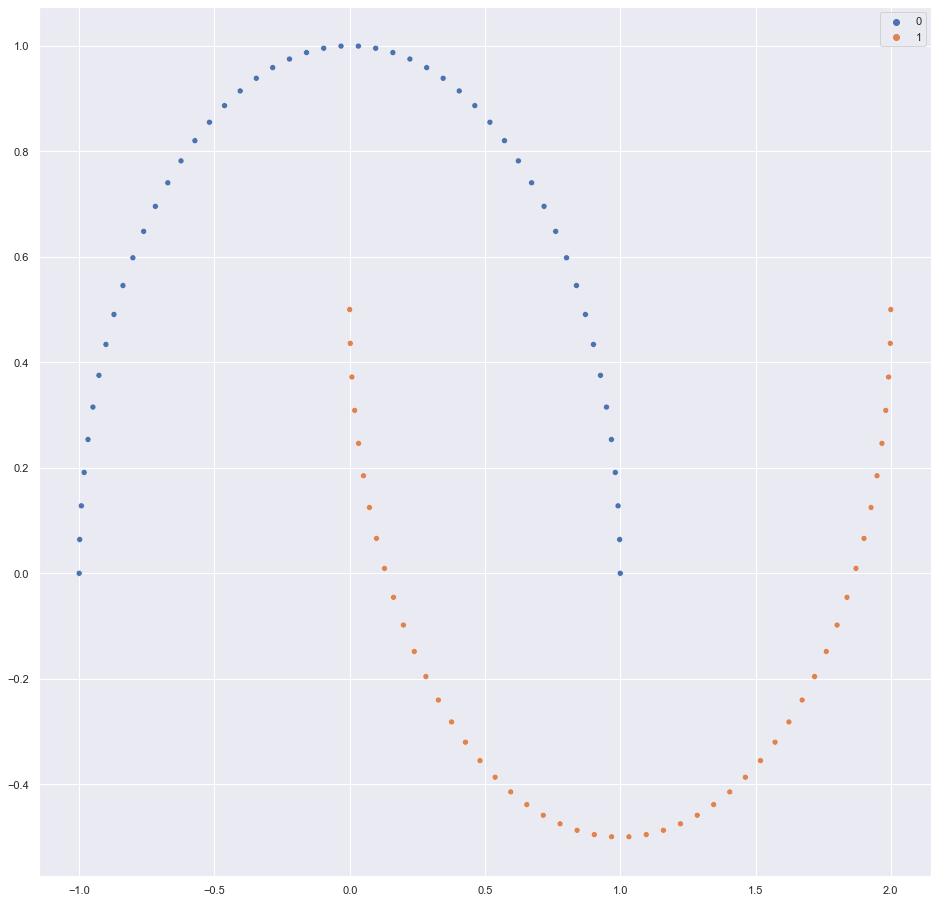

In [89]:
from sklearn.datasets import make_moons

x2, y2 = make_moons()

sns.scatterplot(x2[:,0],x2[:,1], hue = y2);

# Première mise en pratique de t-SNE

Nous pouvons appliquer l’algorithme t-SNE sur les demi-lunes afin de projeter les points sur une droite. Dans ce cas, le nombre de composantes de l’espace cible vaut 1. 

> Consignes:
> * A partir du package ```sklearn.manifold``` importer ```TSNE```.
> 
> 
> * Créer `tsne`, une instance de `TSNE()` ayant pour arguments : 1 seule composante et une perplexité à 30.
> * Créer l'array `embedding`, le résultats de l'entrainement et la transformation de l'array X2 par l'objet `tsne` que nous avons créé précédemment.
> 
> 
> * Afficher la représentation graphique d'`embedding`. Cet array n'ayant qu'une seule dimension, il faut que vous choisissiez une constante à indiquer pour l'axe des ordonnées. Les points devront être colorés selon leur classe originale d'appartenance (la demie-lune à laquelle ils appartiennent).


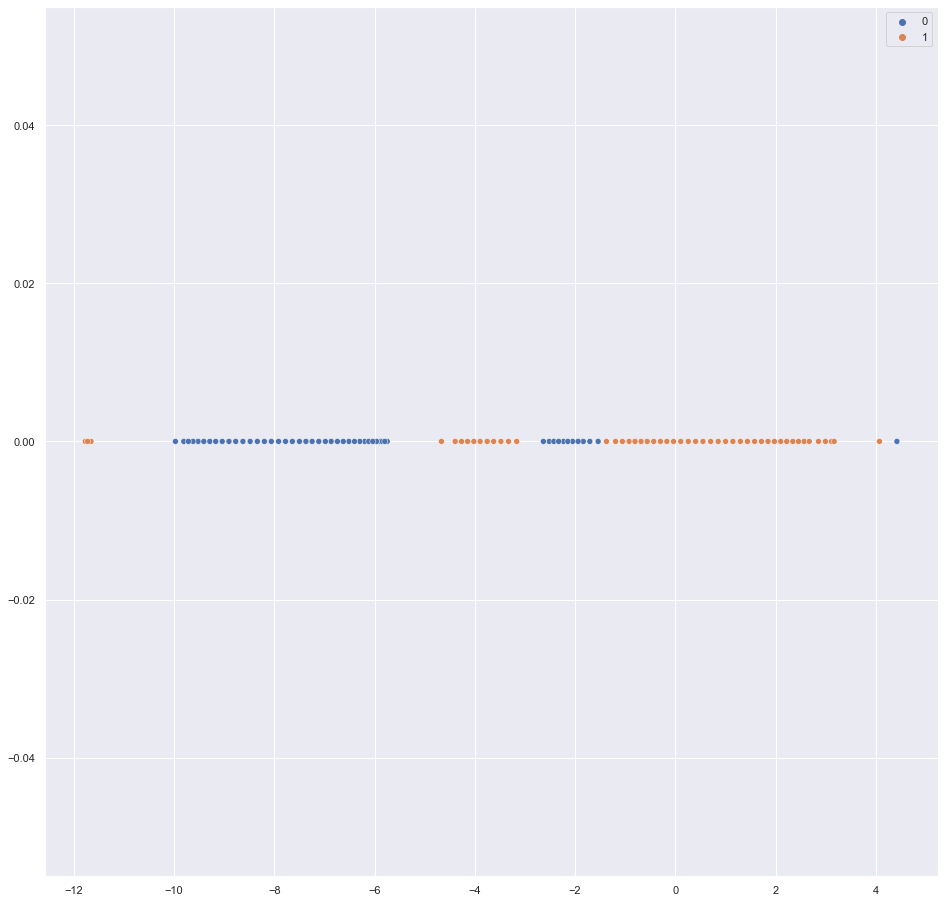

In [91]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=1, perplexity=30)

embedding = tsne.fit_transform(x2)

sns.scatterplot(embedding[:,0], np.zeros(len(embedding)), hue=y2);

Voyons maintenant ce qui se passe lorsque l'on augmente le nombre de comopsantes à 2. Rappelons nous qu'initialement nos données ne peuvent pas être séparées de manière linéaire.

> Consignes:
> * Créer `tsne2`, une instance de `TSNE()` ayant pour arguments : 2 composantes et une perplexité à 30.
> * Créer l'array `embedding2`, le résultats de l'entrainement et la transformation de l'array `X2` par l'objet `tsne2` que nous avons créé précédemment.
> 
> 
> * Afficher la représentation graphique d'`embedding2`. Les points devront être colorés selon leur classe originale d'appartenance (la demie-lune à laquelle ils appartiennent).
>
>
> * C'est l'occasion rêvée de jouer avec le paramètre de perplexité et d'observer ce qui se passe en le modifiant. Aussi, je vous encourage vivement de parcourir brièvement ces [informations](https://distill.pub/2016/misread-tsne/).

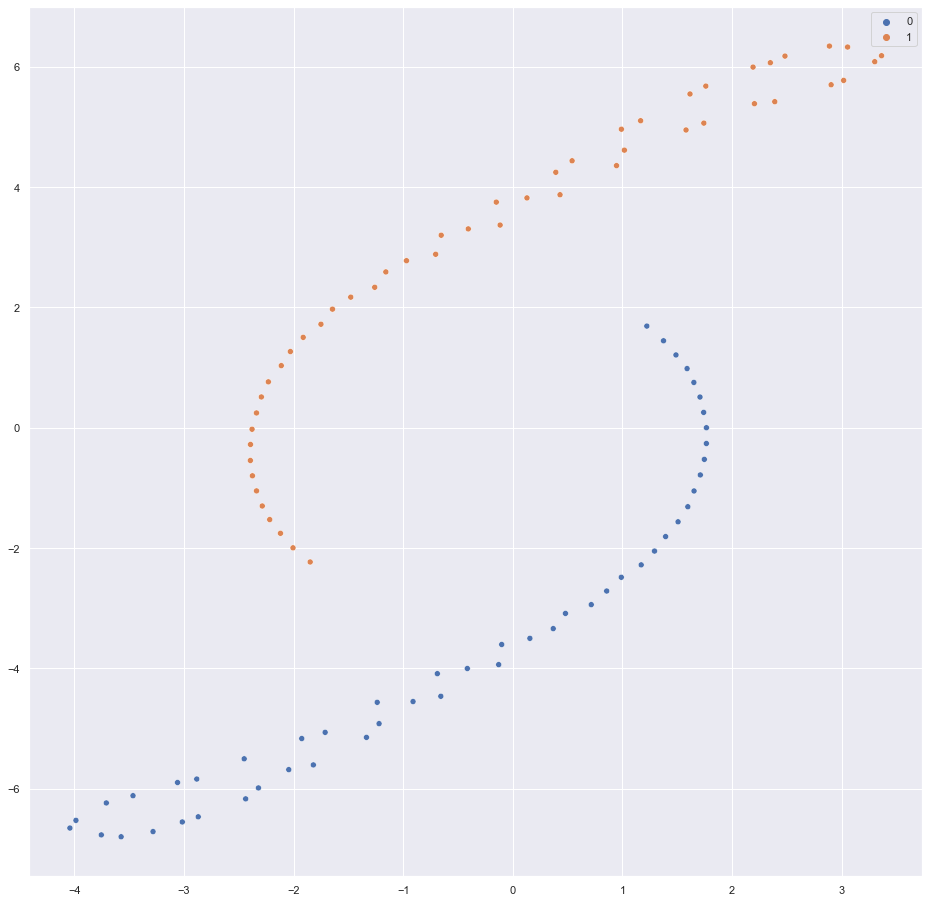

In [92]:
tsne2 = TSNE(n_components=2, perplexity=30)

embedding2 = tsne2.fit_transform(x2)

sns.scatterplot(embedding2[:,0], embedding2[:,1], hue = y2);

# Venons en à nos chiffres.

Il est de voir comment nous pourrions représenter visuellement nos chiffres. Dans le cas où nous commencerions à exploiter ce jeu de données, t-SNE pourrait-il être intéressant ?

> Consignes:
> * Créer `tsne3`, une instance de `TSNE()` ayant pour arguments : 2 composantes et une perplexité à 20, l'argument `verbose` à 0, un état aléatoire à 42 et une méthode `'barnes_hut'`.
>
>
> * Créer l'array `X_train_tsne`, le résultats de l'entrainement et la transformation de l'array `X_train1` par l'objet `tsne3` que nous avons créé précédemment.
>
>
> * Créer une df nommée `dftsne` qui contient dans la colonne `"y"` les labels (issus de `y_train1`), dans deux colonnes `"first_component"` et `"second_component"` respectivement les premières et secondes composante issues de `X_train_tsne`
> 
> 
> * Afficher la représentation graphique à partir de la `dftsne`. Les points devront être colorés selon leur classe originale d'appartenance (la demie-lune à laquelle ils appartiennent). N'oubliez pas de donner un titre à votre graphique et à vos axes !

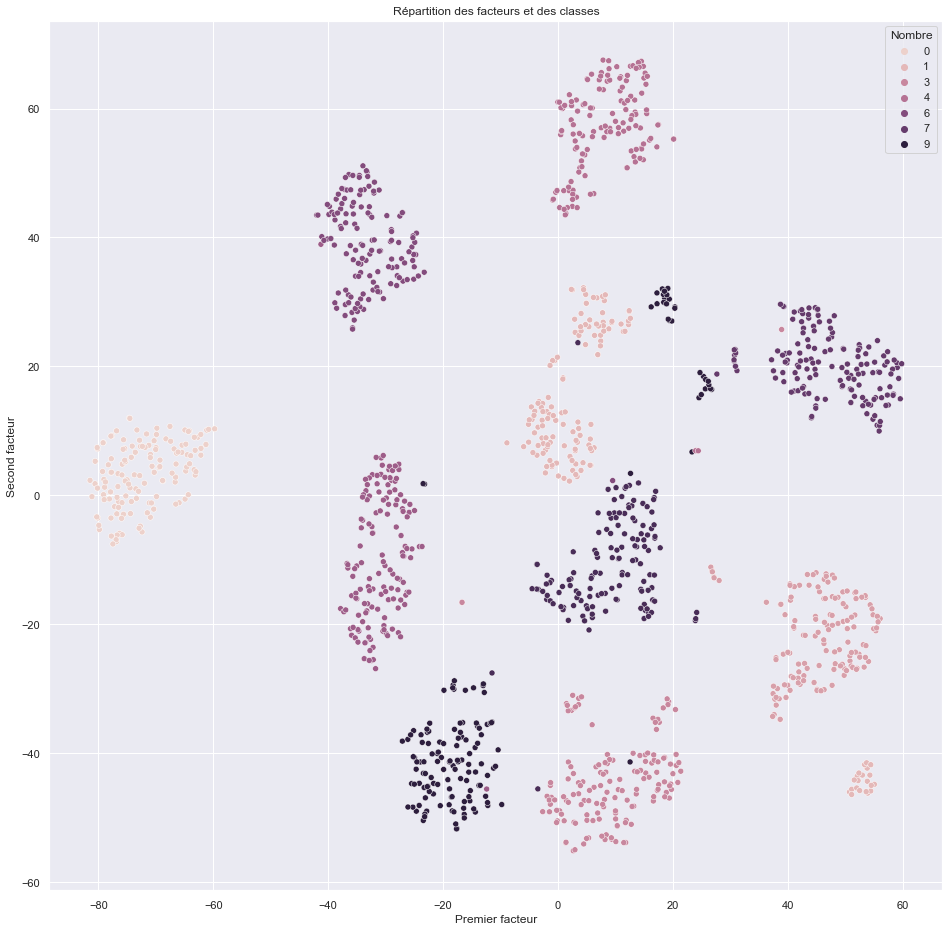

In [93]:
tsne3 = TSNE(n_components=2, perplexity=20, verbose=0, random_state=42, method="barnes_hut")

X_train_tsne = tsne3.fit_transform(X_train1)

dftsne = pd.DataFrame(X_train_tsne, columns=["first_component","second_component"])

dftsne["y"] = y_train1

p = sns.scatterplot(x = "first_component", y = "second_component", data = dftsne, hue = "y");

p.set(xlabel = "Premier facteur", ylabel = "Second facteur");

p.set_title('Répartition des facteurs et des classes');

plt.legend(title='Nombre');

Que voyons nous ?
Par rapport à la PCA, nous pouvons cette fois très bien distinguer des clusters assez nets. La coloration de chaque point nous renseigne en plus que les clusters correspondent en plus à un regroupement des chiffres les uns avec les autres. C'est là un très bon point de départ qui peut nous indiquer par exemple qu'un algorithme de classification / clustering pourrait nous donner de bons résultats. Plus récemment, des avancées permettent même d'imaginer que nous pourrions nourrir des algorithmes plus avancés comme des réseaux de neurones avec ces données issues de la t-SNE... mais cela n'est pas encore une pratique bien établie.

# <font color='orange'>Fin partie</font>